# Titanic - Machine Learning from Disaster - Submission for the competition - [0.78229]

## Table of contents

- [Context](#Context)
- [Project setup](#Project-setup)
- [Loading Data](#Loading-Data)
- [I. Exploratory Data Analysis (EDA)](#I.-Exploratory-Data-Analysis-(EDA))
    - [1. Describing data](#1.-Describing-data)
    - [2. Data visualization](#2.-Data-visualization)
        - [a. How many passengers survived the sinking ?](#a.-How-many-passengers-survived-the-sinking-?)
        - [b. Does a gender have a higher survival rate than another ?](#b.-Does-a-gender-have-a-higher-survival-rate-than-another-?)
        - [c. Does a higher classed passenger have a higher chance of being saved ?](#c.-Does-a-higher-classed-passenger-have-a-higher-chance-of-being-saved-?)
        - [d. But what if we combine the passenger's class and its gender ?](#d.-But-what-if-we-combine-the-passenger's-class-and-its-gender-?)
        - [e. Is the age of the passenger a good indicator of its survival rate ?](#e.-Is-the-age-of-the-passenger-a-good-indicator-of-its-survival-rate-?)
        - [f. Is the port of embarkment a good indicator of survival ?](#f.-Is-the-port-of-embarkment-a-good-indicator-of-survival-?)
        - [g. Does a passenger travelling with his family have a higher survival rate ?](#g.-Does-a-passenger-travelling-with-his-family-have-a-higher-survival-rate-?)
        - [h. How much did each class pay their Titanic ticket ?](#h.-How-much-did-each-class-pay-their-Titanic-ticket-?)
        - [i. Can we learn some useful insights thanks to the tickets numbers ?](#i.-Can-we-learn-some-useful-insights-thanks-to-the-tickets-numbers-?)
        - [j. What did we learn from these analyses ?](#j.-What-did-we-learn-from-these-analyses-?)
    - [3. Correlations between numerical features](#3.-Correlations-between-numerical-features)
- [II. Feature Engineering and Data Wrangling](#II.-Feature-Engineering-and-Data-Wrangling)
    - [1. Data Wrangling](#1.-Data-Wrangling)
        - [a. Filling missing values from the Age column](#a.-Filling-missing-values-from-the-Age-column)
        - [b. Filling missing values from the Embarked column](#b.-Filling-missing-values-from-the-Embarked-column)
        - [c. Convert string values into numerical values](#c.-Convert-string-values-into-numerical-values)
    - [2. Feature Engineering](#2.-Feature-Engineering)
        - [a. Extracting Age information](#a.-Extracting-Age-information)
        - [b. Extracting Family information](#b.-Extracting-Family-information)
        - [c. Extracting Fare information](#c.-Extracting-Fare-information)
        - [d. Dropping unneeded features](#d.-Dropping-unneeded-features)
- [III. Predictive Modeling](#III.-Predictive-Modeling)
    - [1. Logistic Regression](#1.-Logistic-Regression)
    - [2. Linear Support Vector Machine](#2.-Linear-Support-Vector-Machine)
    - [3. Radial Support Vector Machine](#3.-Radial-Support-Vector-Machine)
    - [4. K-Nearest Neighbours](#4.-K-Nearest-Neighbours)
    - [5. Gaussian Naive Bayes](#5.-Gaussian-Naive-Bayes)
    - [6. Decision Tree](#6.-Decision-Tree)
    - [7. Random Forest](#7.-Random-Forest)
- [IV. Cross Validation](#IV.-Cross-Validation)
    - [1. K-Fold Cross Validation](#1.-K-Fold-Cross-Validation)
    - [2. Confusion Matrix](#2.-Confusion-Matrix)
    - [3. Hyperparameters tuning](#3.-Hyperparameters-tuning)
        - [a. SVM](#a.-SVM)
        - [b. Random Forests](#b.-Random-Forests)
        - [c. Logistic Regression](#c.-Logistic-Regression)
- [V. Ensembling](#V.-Ensembling)
    - [1. Voting Classifier](#1.-Voting-Classifier)
    - [2. Bagging](#2.-Bagging)
        - [a. Bagged KNN](#a.-Bagged-KNN)
        - [b. Bagged Decision Tree](#b.-Bagged-Decision-Tree)
    - [3. Boosting](#3.-Boosting)
        - [a. AdaBoost](#a.-AdaBoost)
        - [b. Stochastic Gradient Boosting](#b.-Stochastic-Gradient-Boosting)
        - [c. XGBoost](#c.-XGBoost)
    - [4. Confusion Matrix of the best model](#4.-Confusion-Matrix-of-the-best-model)
- [VI. Feature Importance](#VI.-Feature-Importance)
- [VII. Competition Submission](#VII.-Competition-Submission)
- [VIII. Note of the author](#VIII.-Note-of-the-author)

## Context

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, they ask us to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

![Titanic](https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/front_page.png)

## Project setup

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# ensembling
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xg

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Loading Data

In [2]:
train_df = pd.read_csv('../input/titanic/train.csv') # load our training dataset
test_df = pd.read_csv('../input/titanic/test.csv') # load our test dataset

## I. Exploratory Data Analysis (EDA)

**Exploratory Data Analysis (EDA)** refers to the process of **exploring and analyzing data** to understand its characteristics, patterns, and relationships.

A good EDA helps to identify and address issues with the data, such as missing or inconsistent values, outliers, or biases. By understanding the data and its properties, we can choose the appropriate preprocessing techniques and feature engineering strategies to improve the quality of the data for the model.

In addition, EDA helps to **identify important variables or features** that are most relevant to the prediction task. This process can guide the selection of the most appropriate machine learning algorithms and techniques that are best suited for the data and the task at hand.

EDA can also help to validate the assumptions made about the data, such as its distribution or correlation between variables. This process can help to avoid overfitting, which is a common issue in machine learning models that can lead to poor generalization performance on new data.

Overall, a good EDA is crucial to building effective and accurate predictive models. Without a proper understanding of the data and its properties, it is challenging to build reliable and useful machine learning models.

**Let's start by looking at our dataset.**

### 1. Describing data

In [3]:
train_df.shape # prints the number of rows and columns of our training dataset

(891, 12)

We can see that our training dataset contains **12 columns** for **891 rows**.

In [4]:
print(train_df.columns.values) # prints the columns names of our training dataset
print('_'*70)
train_df.info() # prints the columns information of our training dataset

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
______________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As we saw earlier, our training dataset contains 12 columns. They are splitted into 7 numerical columns, *PassengerId*, *Survived* (our target value), *Pclass*, *Age*, *SibSp*, *Parch*, and *Fare*, and 5 categorical columns, *Name*, *Sex*, *Ticket*, *Cabin* and *Embarked*.

**Let's now see at what our data looks like.**

In [5]:
train_df.head() # prints the first 5 rows of our training dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.tail() # prints the last 5 rows of our training dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Let's check at the same time if some of our columns contains **missing values**.

In [7]:
train_df.isnull().sum() # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

With this, we now know what information contains each of our columns and we can explain it a bit more accurately. So we have : 

- **PassengerId** : Unique value to identify each passenger.
- **Survived** (*Target value*) : It can be either 1 or 0 depending on if the passenger survived or not.
- **Pclass** : Ordinal value categorizing each passenger into three classes, 1, 2 or 3.
- **Name** : Passenger fullname and their title.
- **Sex** : Gender of the passenger. It can either be male or female.
- **Age** : Age of the passenger. It is considered as a float and contains 177 missing values.
- **SibSp** : Number of siblings / spouse onboard with the passenger.
- **Parch** : Number of parents / children onboard with the passenger.
- **Ticket** : Numero of the passenger's ticket.
- **Fare** : Price paid by the passenger to embark on the Titanic
- **Cabin** : Numero of the passenger's cabin. It contains by far the most missing values with 687 passengers without an attributed cabin number.
- **Embarked** : Port where the passenger embarked on the Titanic. It can take up to three different values with S (Southampton), Q (Queenstown) and C (Cherbourg).

Now that we know what compose our dataset, let's see the **descriptive statistics** of the numerical values of our training dataset.

In [8]:
train_df.describe() # prints out the descriptive statistics of the training dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can learn a bunch of things just by looking at these statistics, for example :

- The average age of the passengers onboard is **29 years and 8 months old**. The youngest passenger is a baby and actually is **5 months old** while the oldest is **80 years old**.
- On average each passenger has **0.52 siblings/spouse** and **0.38 parents/children onboard**.
- On average each passenger paid **32.2 dollars** to embark on the titanic, but passengers seems to have embarked **freely** or, for a maximum amount of **512.32 dollars**.

We can alse see those statistics for our categorical values.

In [9]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Here we can note several things : 

- The *Name* column doesn't contain any duplicate, each passenger has a unique name attribute
- The *Ticket* column has a high percentage (23%) of duplicate values.
- The *Cabin* column also has a really high percentage (28%) of duplicates values, but it can be explained by the fact that passengers may have shared the cabins.
- There is a majority of male passengers onboard.
- A large majority of the passengers embarked in the port of Southampton.

With all these new insights, let's start **visualizing our data** to find even more patterns to use in our predicting model.

### 2. Data visualization

Data visualization is a critical aspect of data analysis because it allows us to visually represent complex data in a way that is easy to understand and interpret. The importance of data visualization can be summarized in the following points :

- **Communicate insights effectively** : Visualization helps to communicate complex data and insights in a clear, concise, and intuitive manner. By using charts, graphs, and other visual aids, we can easily convey important patterns and relationships in the data to stakeholders who may not have a technical background.

- **Identify patterns and trends** : Visualization can help us to identify patterns, trends, and outliers in the data that may not be apparent in raw data or summary statistics. For example, scatter plots and line charts can help to identify trends over time, while box plots and histograms can help to identify the distribution of data and any outliers.

- **Facilitate exploratory data analysis** : Visualization is an essential tool for exploratory data analysis, which is the process of exploring and understanding data to generate insights and hypotheses. By visualizing data, we can quickly identify potential issues or biases in the data and generate hypotheses for further analysis.

- **Aid decision-making** : Visualization can help to support decision-making by providing a clear and intuitive representation of data. By visualizing data, we can better understand the impact of different scenarios or choices and make more informed decisions.

- **Enhance data storytelling** : Visualization can help to enhance data storytelling by providing a visual context for data and insights. By combining visualizations with narrative explanations, we can create compelling stories that help to engage and persuade stakeholders.

Overall, data visualization is essential for effectively analyzing and communicating complex data. By leveraging the power of visual representation, we can gain a deeper understanding of data, identify patterns and trends, support decision-making, and enhance data storytelling.

I will work by asking questions and answering them with visualizations.

#### a. How many passengers survived the sinking ?

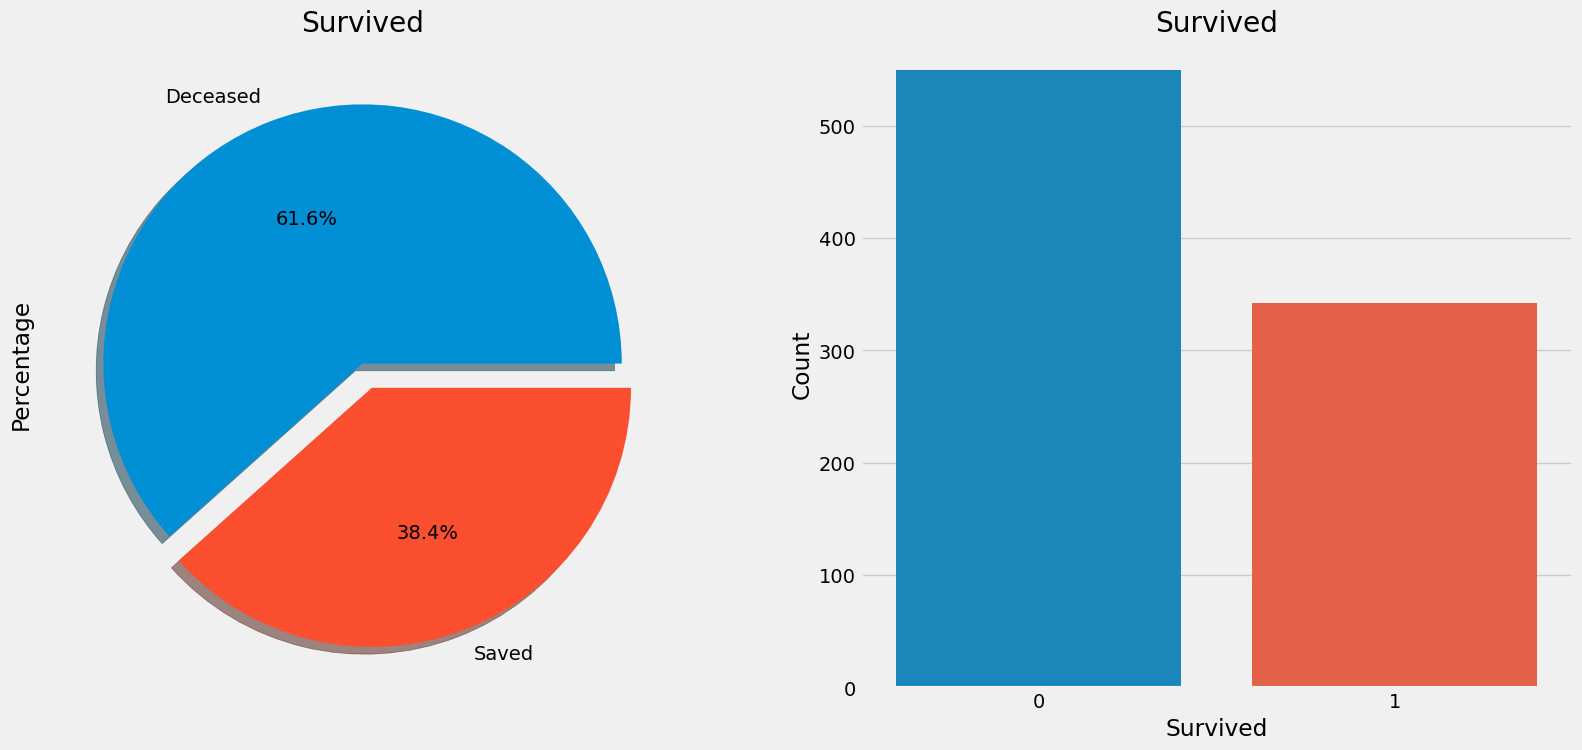

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_df['Survived'].value_counts().plot.pie(labels=['Deceased','Saved'], explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('Percentage')
sns.countplot(data=train_df, x='Survived', ax=ax[1])
ax[1].set_title('Survived')
ax[1].set_ylabel('Count')
plt.show()

Out of the 891 passengers of our training dataset, only **38.4%** survived. Let's see now if we can highlight features of our dataset that significantly increase the survival rate.

#### b. Does a gender have a higher survival rate than another ?

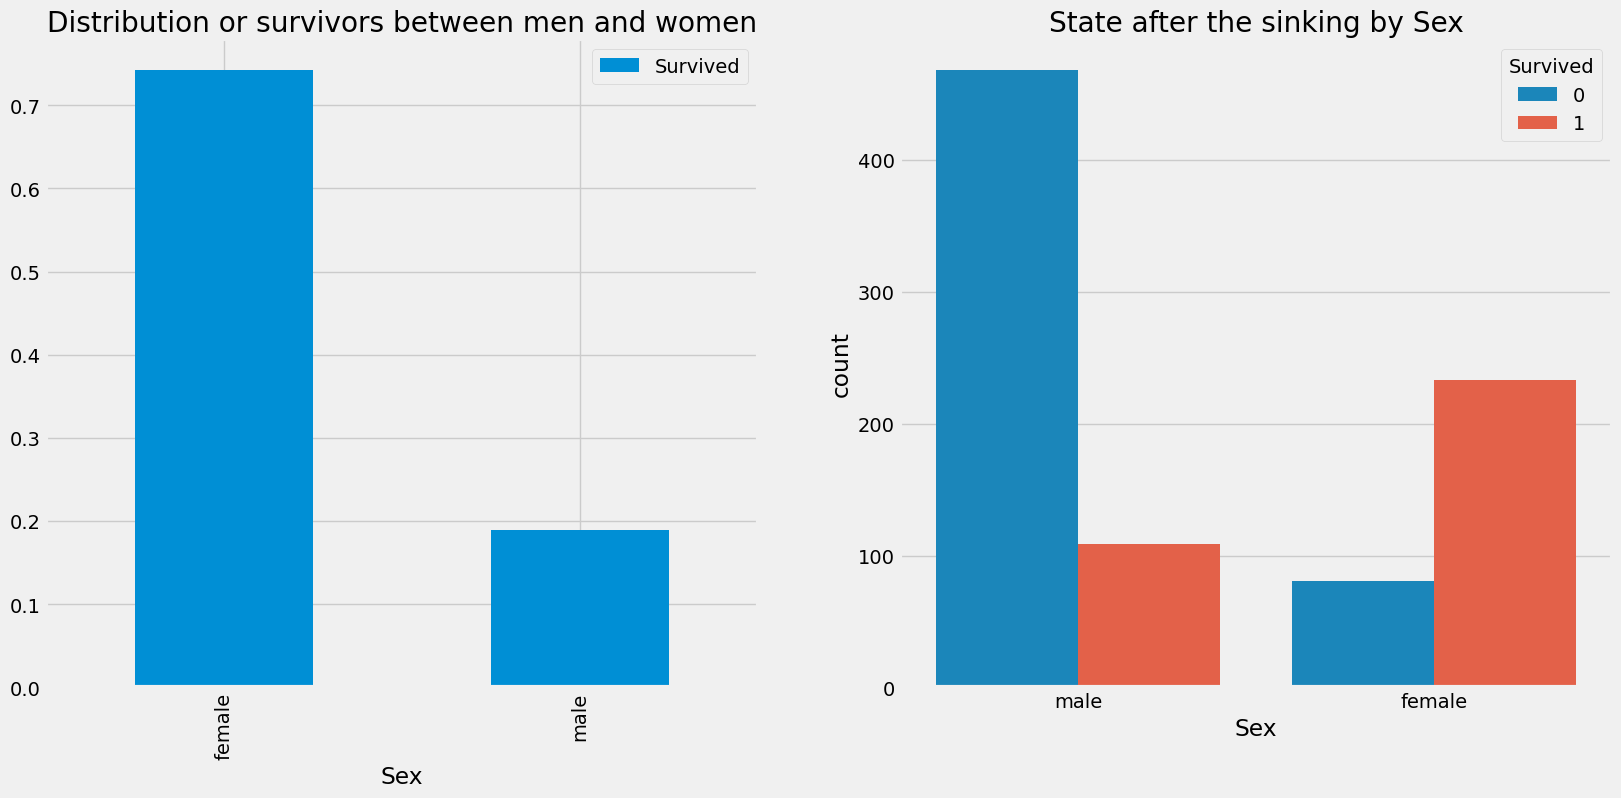

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Distribution or survivors between men and women')
sns.countplot(data=train_df, x='Sex',hue='Survived', ax=ax[1])
ax[1].set_title('State after the sinking by Sex')
plt.show()

We already know that there is a majority of men on the ship but we can see that it doesn't mean that they have the highest survival rate. In fact, it is quite the contrary. A little less than **20% of the survivors are men**. Moreover, we can see that **more than twice as many women are saved from the sinking than men**.

It seems so that *Sex* is a really important feature to add to our predictive model.

#### c. Does a higher classed passenger have a higher chance of being saved ?

In [12]:
pd.crosstab(train_df.Pclass, train_df.Survived, margins=True).style.background_gradient(cmap='rocket_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


We can see that despite being a lot more, the third class is also the class that dies the most. Here, we can calculate that the third class represents **55.1%** of the passengers but also **67.7%** of the deceased, with **75.7%** of the class not being saved. We can't say the same thing for the other two classes with respectively a survival rate of **47.2%** and **62.9%** for both second and first class. Those results are even more noticeable visually.

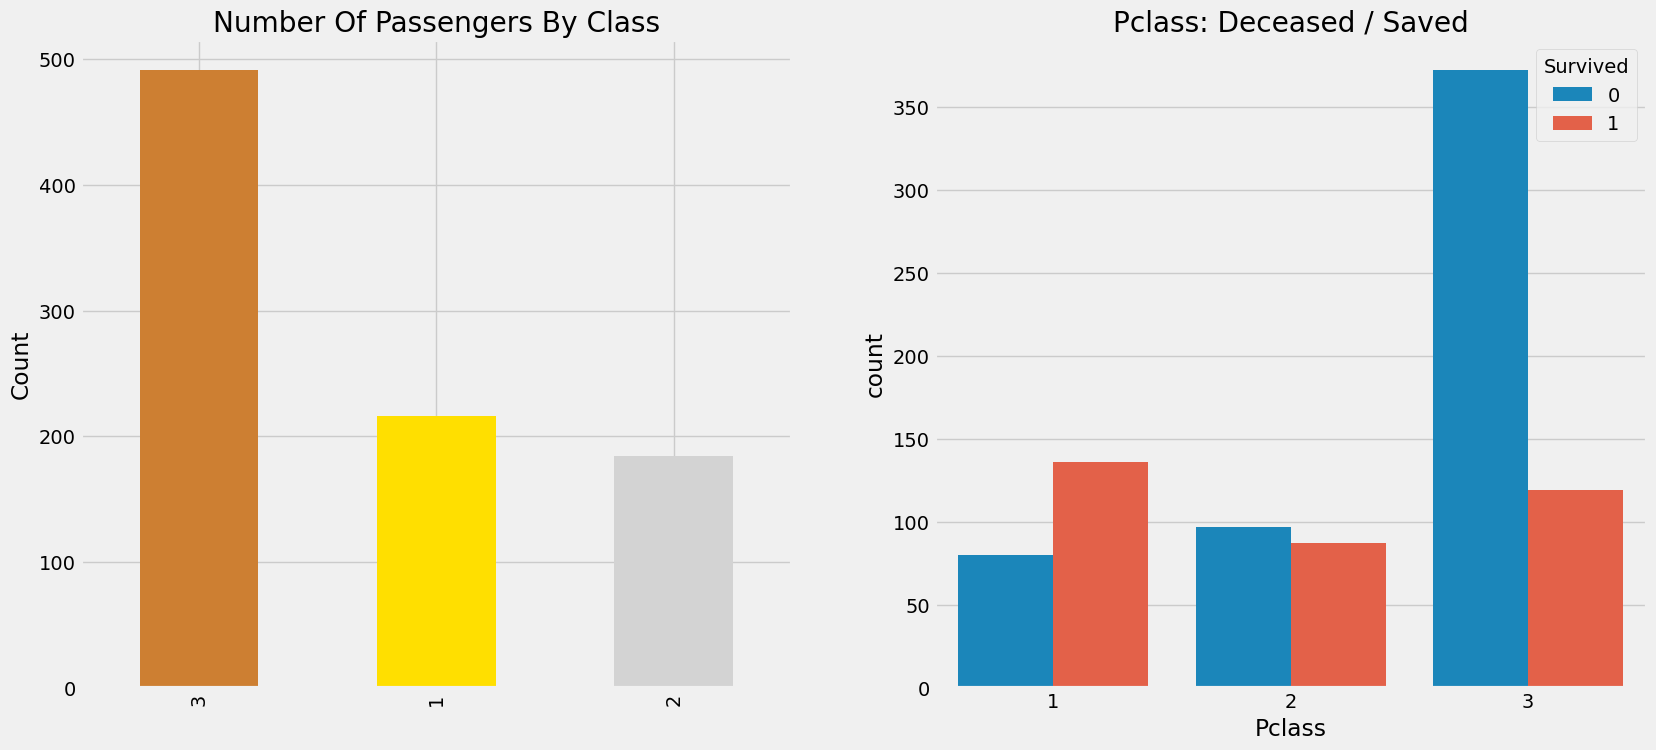

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Class')
ax[0].set_ylabel('Count')
sns.countplot(data=train_df, x='Pclass', hue='Survived', ax=ax[1])
ax[1].set_title('Pclass: Deceased / Saved')
plt.show()

So, the passenger's class is indeed relevant in our prediction.

#### d. But what if we combine the passenger's class and its gender ?

In [14]:
pd.crosstab([train_df.Sex,train_df.Survived],train_df.Pclass,margins=True).style.background_gradient(cmap='rocket_r')

We can see that women from the first class has a **96.8%** of survival rate, with only 3 deceased women. It shows even more that women were given first priority while rescue, as we can see on the next chart, because even men from the first class only have a **36.8%** of survival rate. 

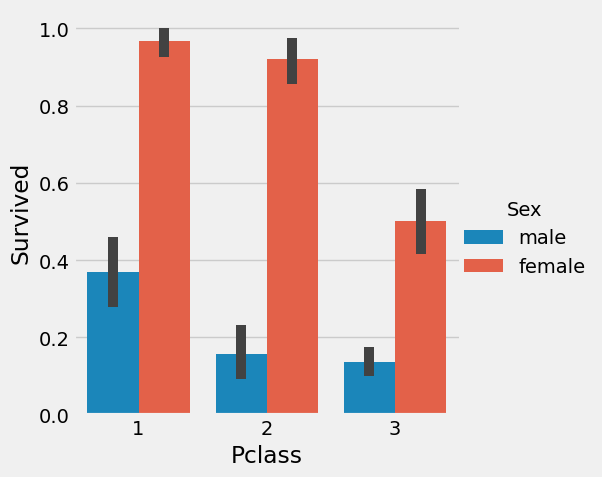

In [15]:
sns.catplot(data=train_df, x='Pclass', y='Survived', hue='Sex', kind="bar")
plt.show()

*Pclass*, as well as *Sex* is indeed an important feature to add to our predictive model.

#### e. Is the age of the passenger a good indicator of its survival rate ?

As we saw earlier, the eldest person on the ship was **80 years old** (at least in our dataset), the youngest was **5 months old** and the average age was **29 years and 8 months old**. Let's see how age influenced their chances of survival, combined with their gender and class.

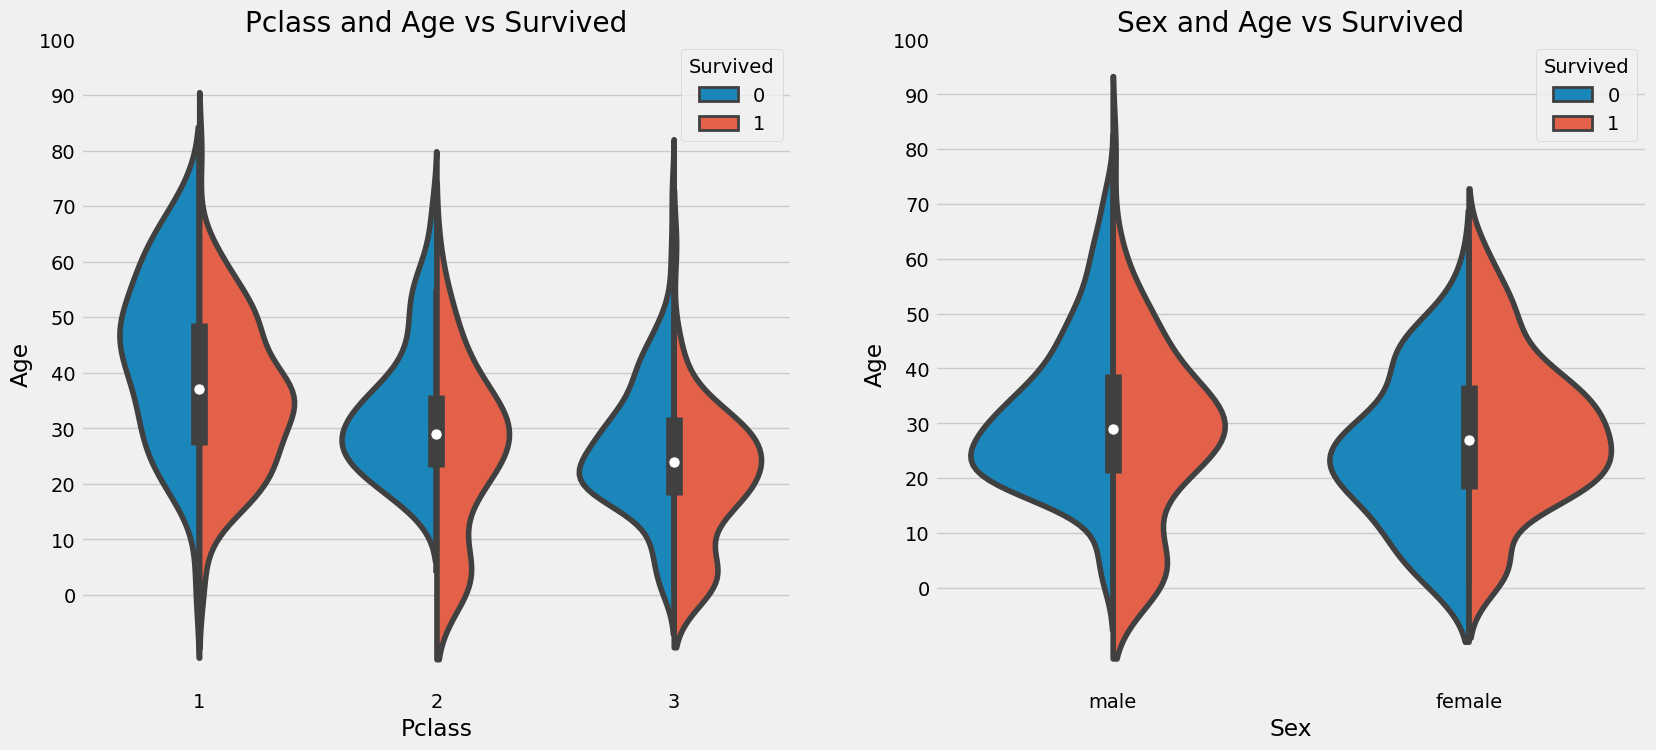

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(data=train_df, x="Pclass",y="Age", hue="Survived", split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(data=train_df, x="Sex", y="Age", hue="Survived", split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

A few things that we can note out of those charts :

- Children (Age < 10) seems to have a **higher survival rate** than others, and this independantly from their class.
- Yougsters to middle aged people (20-50) from the first class have a **good survival rate**, even better if you are a woman of this age.
- As a man, the older you are, the less likely you are to survive the sinking.

But for now, there are two main problems, *Age* is a **continuous feature**, and as we saw earlier, it still has **177 missing values**. We will solve those problems later on in the feature engineering part.

#### f. Is the port of embarkment a good indicator of survival ?

In [17]:
pd.crosstab([train_df.Embarked,train_df.Pclass],[train_df.Sex,train_df.Survived],margins=True).style.background_gradient(cmap='rocket_r')

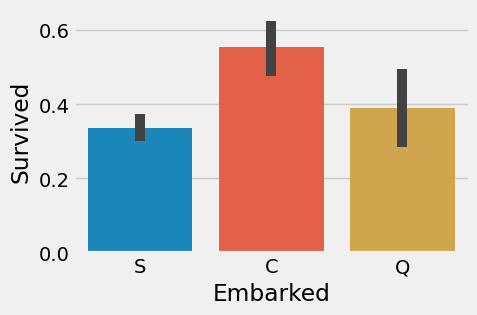

In [18]:
sns.catplot(data=train_df, x='Embarked', y='Survived', kind="bar")
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

We can see that Cherbourg is the port with the highest survival rate with nearly **55%**. Let's investigate a bit more to see why it is the case.

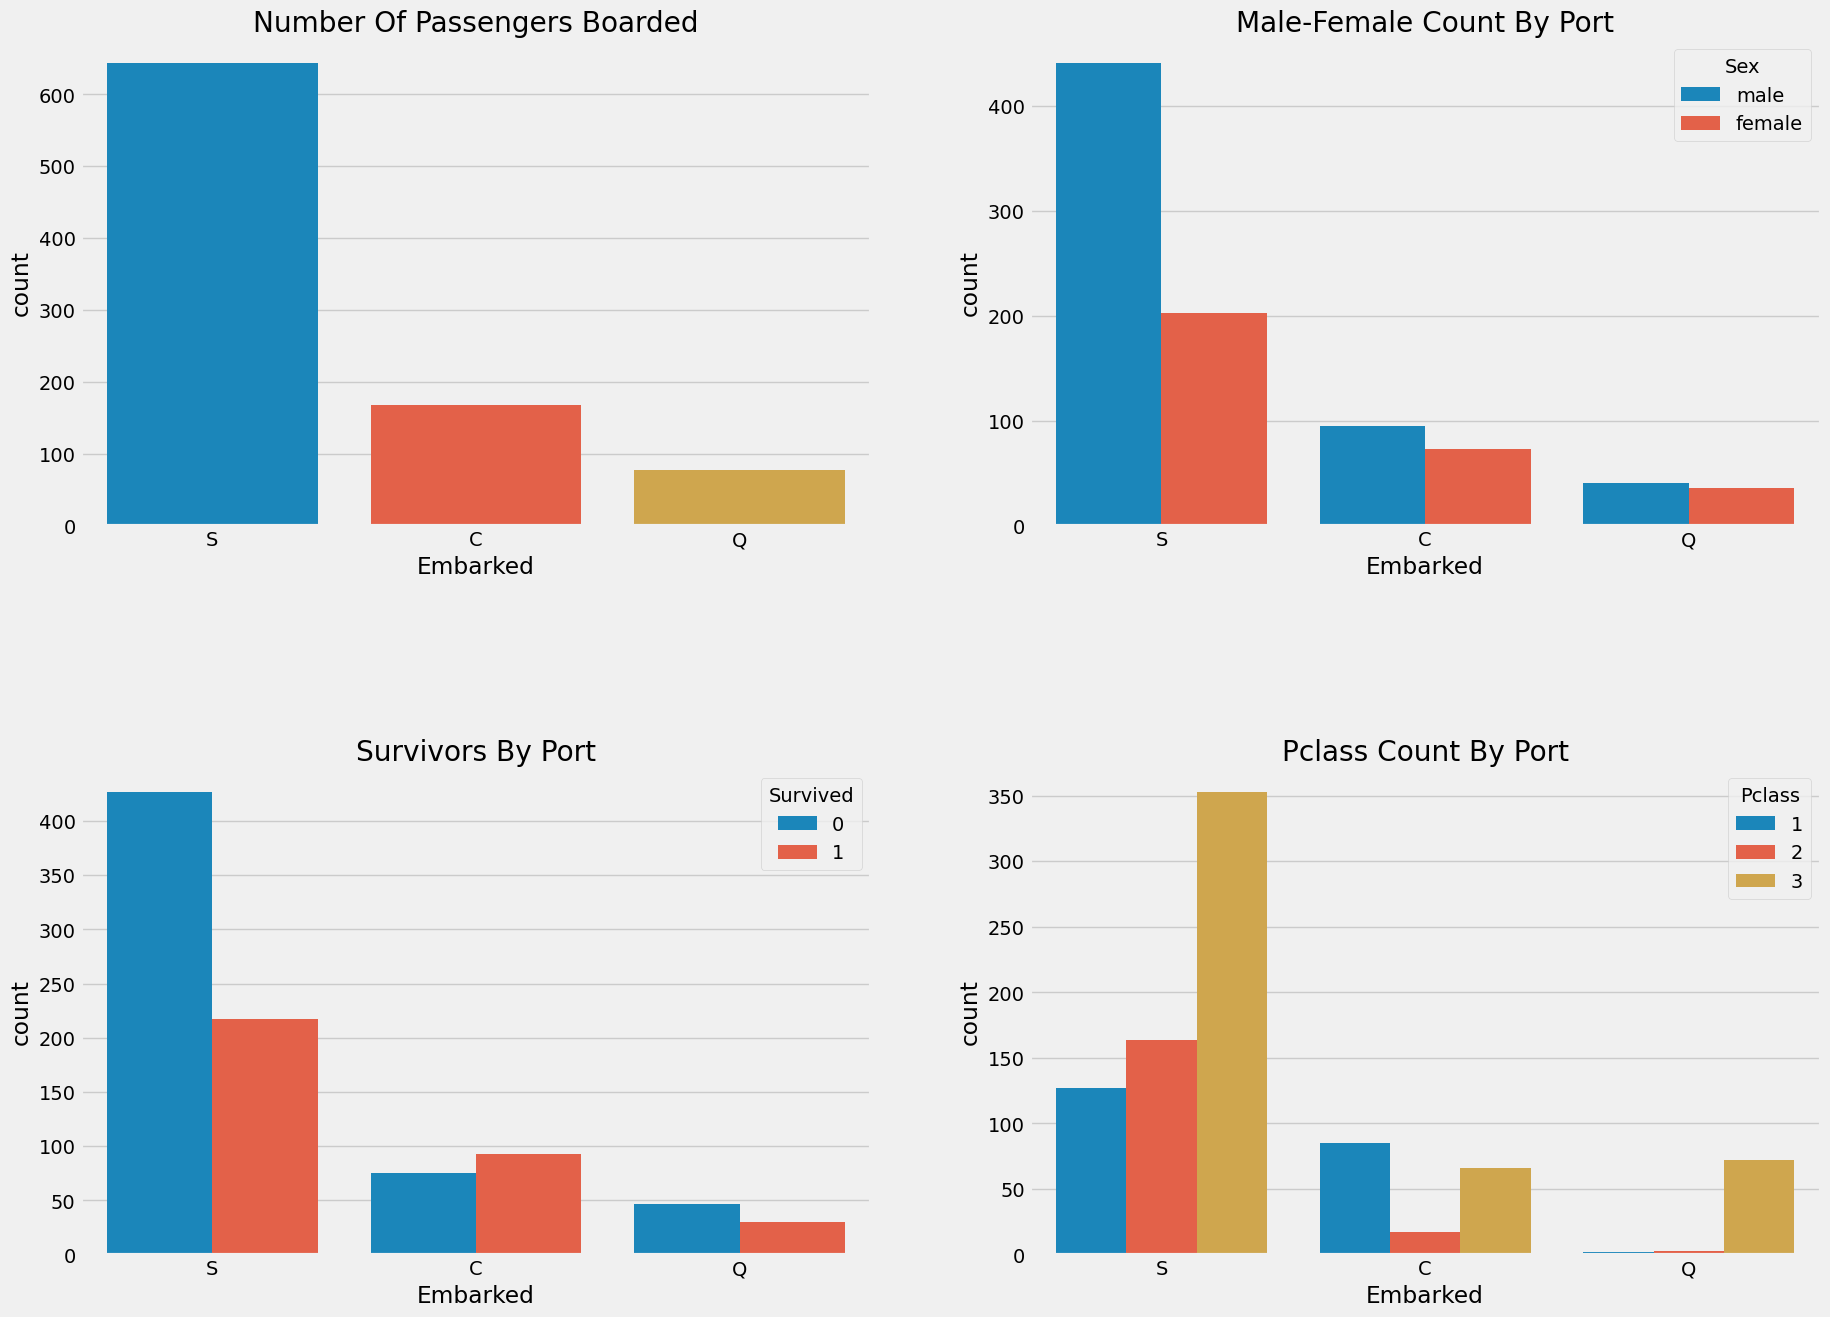

In [19]:
f,ax=plt.subplots(2,2,figsize=(20,15))

sns.countplot(data=train_df, x='Embarked', ax=ax[0,0])
ax[0,0].set_title('Number Of Passengers Boarded')

sns.countplot(data=train_df, x='Embarked', hue='Sex', ax=ax[0,1])
ax[0,1].set_title('Male-Female Count By Port')

sns.countplot(data=train_df, x='Embarked', hue='Survived', ax=ax[1,0])
ax[1,0].set_title('Survivors By Port')

sns.countplot(data=train_df, x='Embarked', hue='Pclass', ax=ax[1,1])
ax[1,1].set_title('Pclass Count By Port')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

As we can see : 

- The majority of the passengers embarked in Southampton (**72.4%**) with a vast majority of third class passengers
- Because of this majority of third class passengers (**81%** of them will not survive the sinking), Southampton has the worst survival rate among the three ports.
- The high survival rate of passengers from Cherbourg must have for reason the high amount of first class passengers embarking from this port.
- **93.5%** of passengers from Queenstown were in the third class.

Finally, we can observe that women from the first and second classes have nearly **100%** chances of being saved, irrespective of their boarding port. Unluckily for third class passengers from Southampton, women and men both have a really low survival rate. As for men from Queenstown, they almost all died in the sinking, mainly because they were **94.7%** from the third class. 

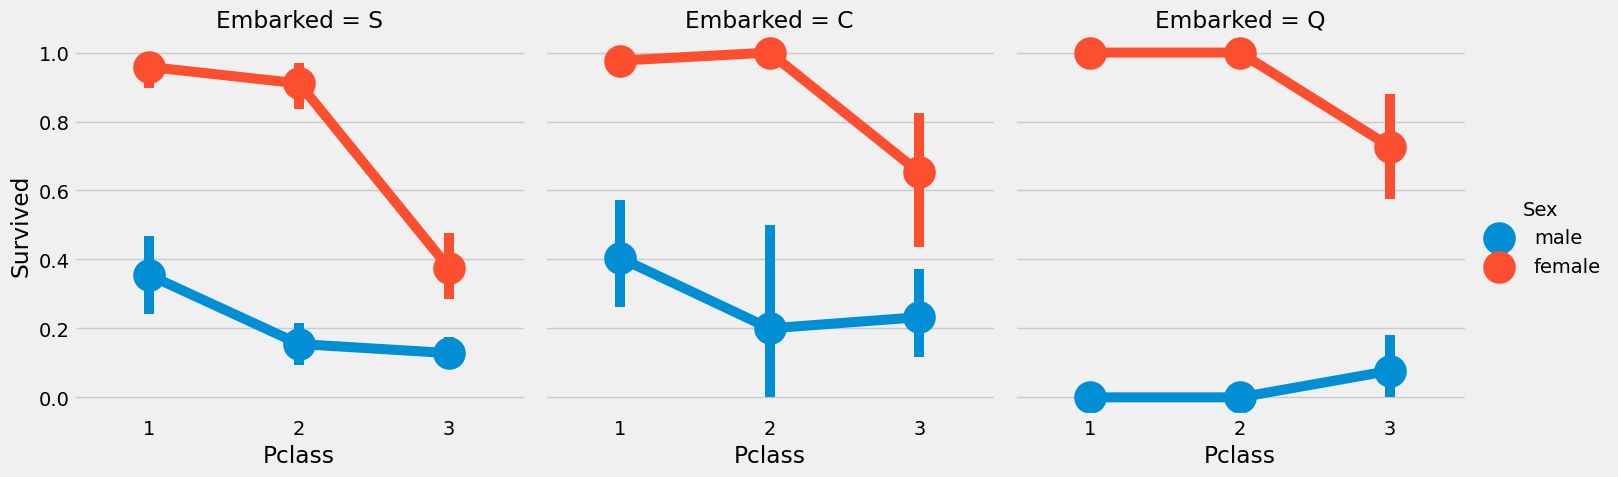

In [20]:
sns.catplot(data=train_df, x='Pclass', y='Survived', hue='Sex', col='Embarked', kind="point")
plt.show()

#### g. Does a passenger travelling with his family have a higher survival rate ?

Two features in our dataset can help us know if a passenger travelled alone or not : *Sibsp* and *Parch*. Let's now see how families are distributed among classes, and how well they did during the sinking.

In [21]:
pd.crosstab([train_df.SibSp],train_df.Survived).style.background_gradient(cmap='rocket_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [22]:
pd.crosstab([train_df.Parch],train_df.Survived).style.background_gradient(cmap='rocket_r')

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [23]:
pd.crosstab(train_df.SibSp,train_df.Pclass).style.background_gradient(cmap='rocket_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [24]:
pd.crosstab(train_df.Parch,train_df.Pclass).style.background_gradient(cmap='rocket_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


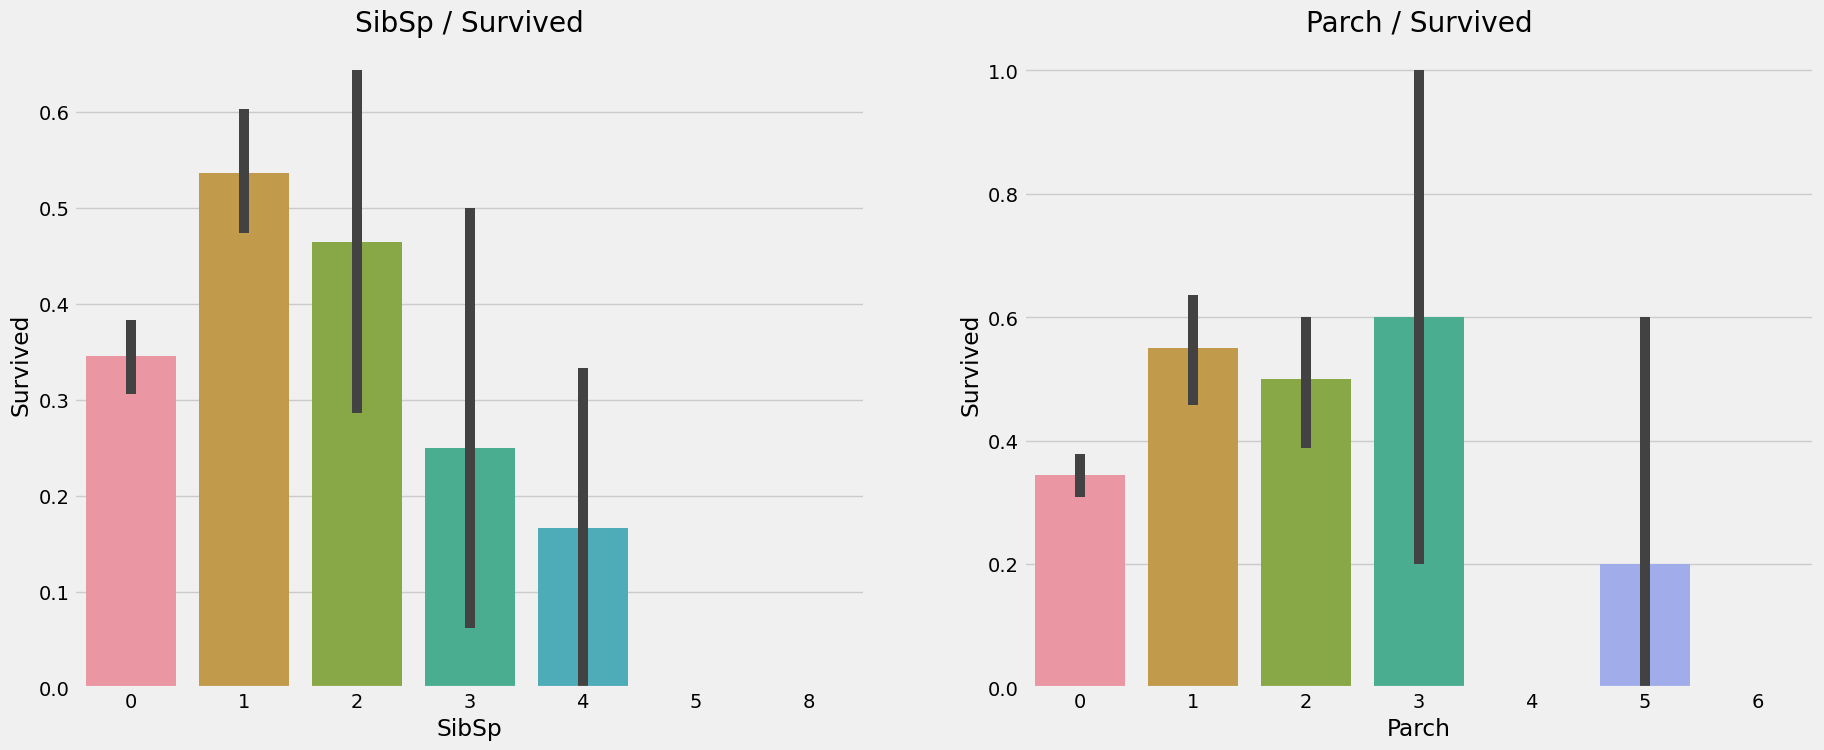

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,8))

sns.barplot(data=train_df, x='SibSp', y='Survived', ax=ax[0])
ax[0].set_title('SibSp / Survived')

sns.barplot(data=train_df, x='Parch', y='Survived', ax=ax[1])
ax[1].set_title('Parch / Survived')

plt.show()

Firstly, we can see that a person embarking without any siblings/spouse has a **34.5%** of chances of surviving. With one sibling, it goes up to **53.5%**, but it then decreases for each new sibling added. It would seem that passengers tends to save their siblings/spouse lives over themselves. Passengers with a number of siblings/spouse over four have no chances of surviving. It can be explained by their class, because all of those bigger families were third classed.

We can observe approximately the same pattern with passengers' parents. Indeed, a passenger travelling with **1-3 of their parents will have a good survival rate**, way higher than an alone passenger. In the same time, passengers travelling with **more than four parents** come from the third class and have close to **no chance of surviving**.

#### h. How much did each class pay their Titanic ticket ?

As we saw earlier, the most expensive ticket was paid **512.32 dollars** (at least in our dataset), the cheapest was **free** and the average price for each passenger was **32.2 dollars**. Let's see more in depth how it was distributed among classes.

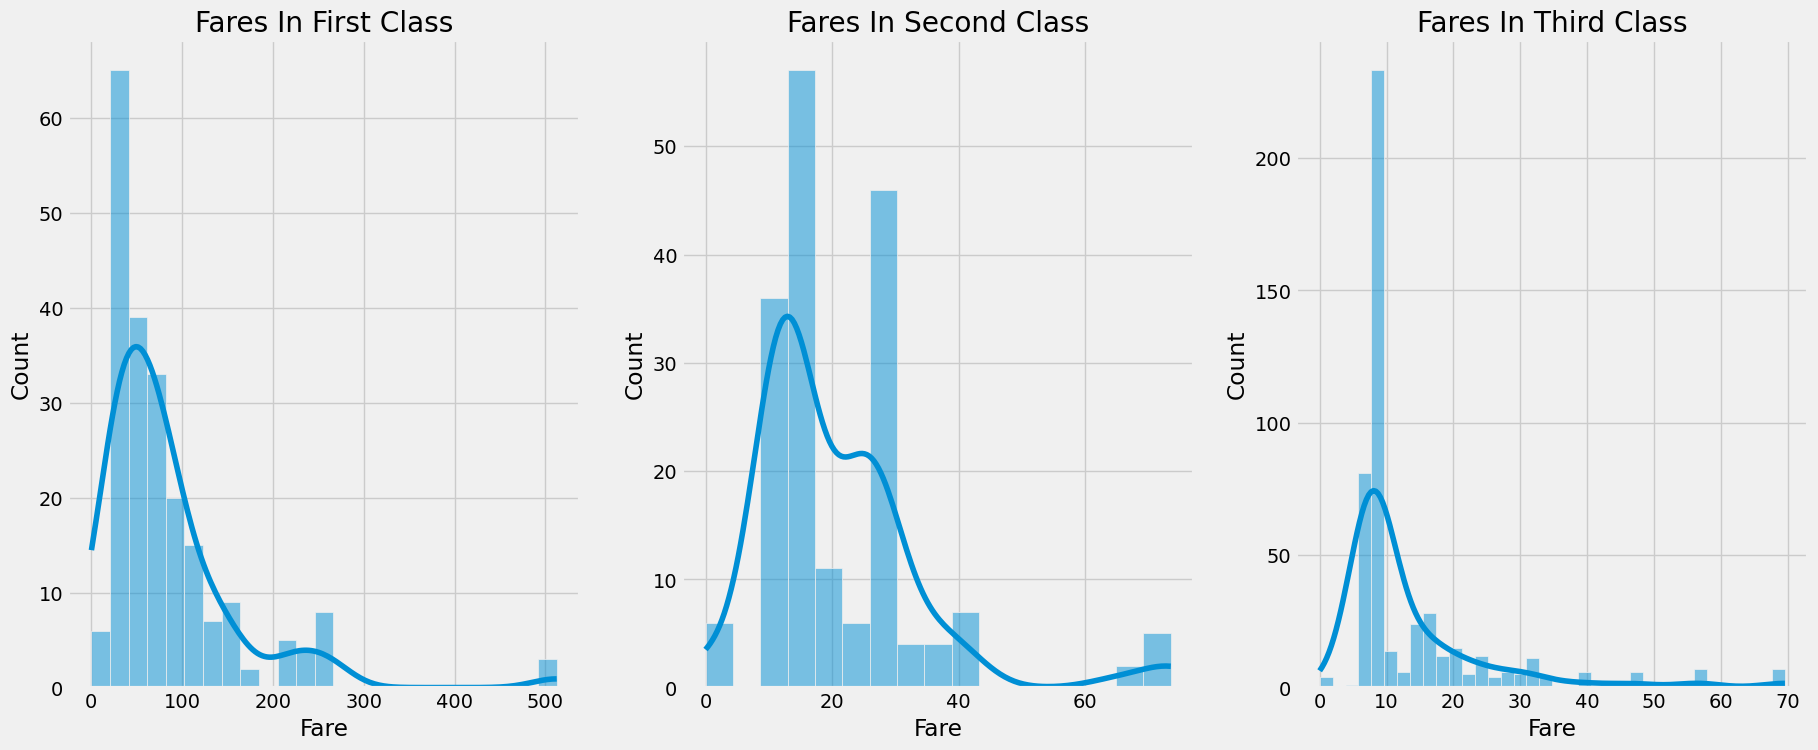

In [26]:
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.histplot(train_df[train_df['Pclass']==1].Fare, kde="True", ax=ax[0])
ax[0].set_title('Fares In First Class')

sns.histplot(train_df[train_df['Pclass']==2].Fare, kde="True", ax=ax[1])
ax[1].set_title('Fares In Second Class')

sns.histplot(train_df[train_df['Pclass']==3].Fare, kde="True", ax=ax[2])
ax[2].set_title('Fares In Third Class')

plt.show()

It seems that prices for first class tickets belong to a wide range. We will also treat the fact that this feature is continuous later on this notebook.

#### i. Can we learn some useful insights thanks to the tickets numbers ?

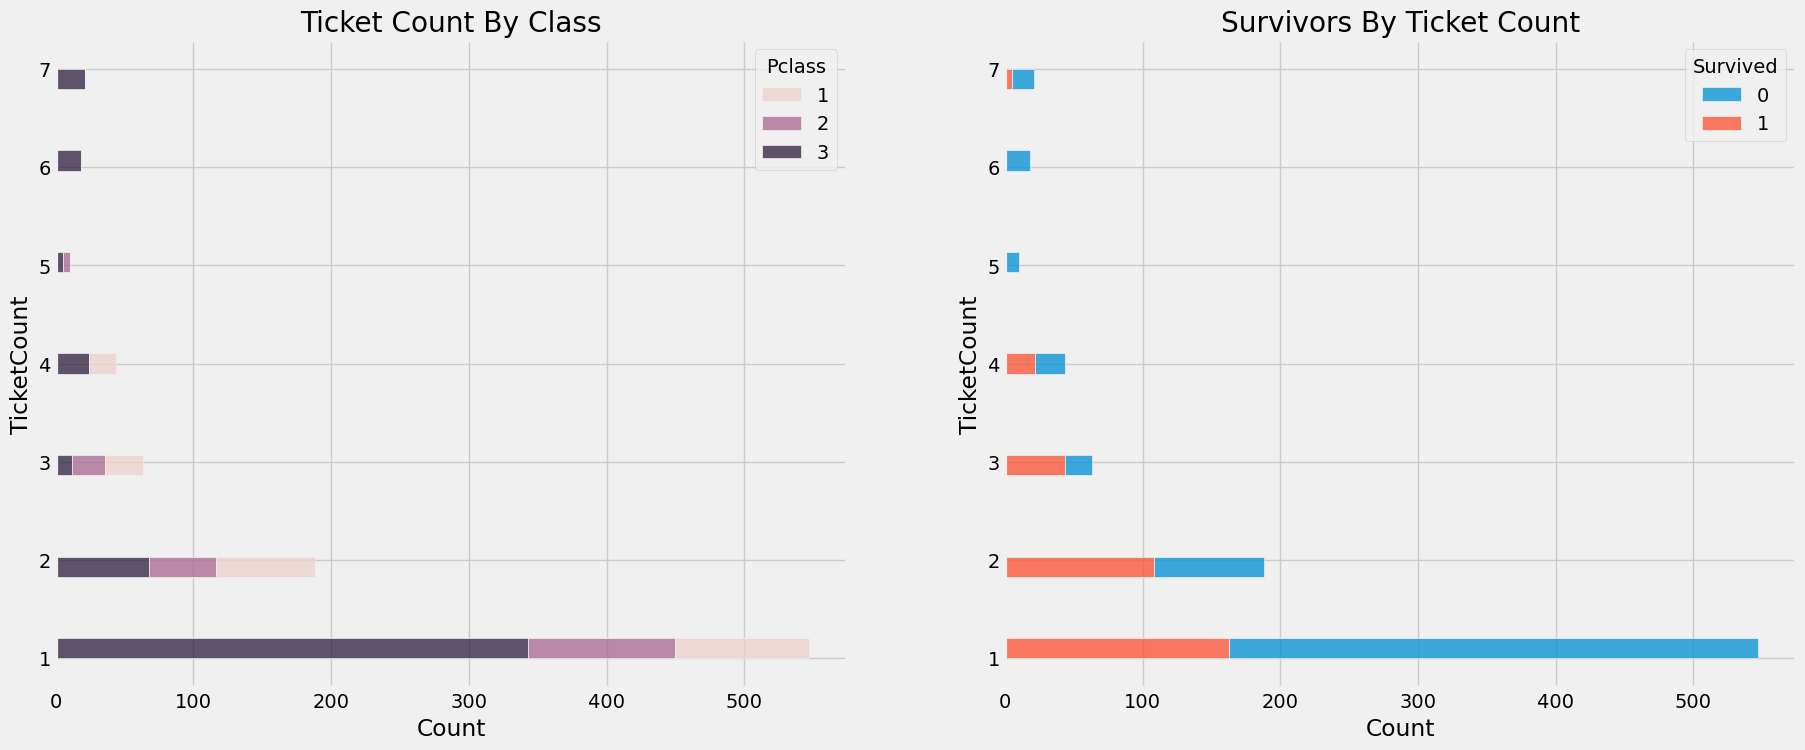

In [27]:
train_copy = train_df.copy()
ticket_count = train_df.groupby('Ticket').size()
train_copy['TicketCount'] = train_copy['Ticket'].map(ticket_count)

f,ax=plt.subplots(1,2,figsize=(20,8))

sns.histplot(data=train_copy, y='TicketCount', hue='Pclass', multiple="stack", ax=ax[0])
ax[0].set_title('Ticket Count By Class')

sns.histplot(data=train_copy, y='TicketCount', hue='Survived', multiple="stack", ax=ax[1])
ax[1].set_title('Survivors By Ticket Count')

plt.show()

We can see that the vast **majority of passengers had their own unique ticket number**. We can assume that people with a **duplicate ticket number were from the same family** which confirms our previous point, third class passengers were travelling with larger families than the other two classes. Moreover, we saw that having more than 4 members of your family with you produces a null survival rate, mostly because those families are from the third class, and here, almost **all members with a ticket count superior to 4 is from the third class** and almost all of them died in the sinking.

#### j. What did we learn from these analyses ?

- *Sex* : Women have a higher chance of survival than men

- *Pclass* : Being a first class passenger gives you a higher survival rate than any other classes. Women from this class nearly have 100% chance of being saved. On the contrary, third class passengers have a really low survival rate.

- *Age* : Children have a higher survival rate.

- *Embarked* : Almost only third class passengers embarked from Queenstown. Passengers from Cherbourg have the higher survival rate despite Southampton having the most first class passengers.

- *Sibsp*/*Parch* : Being with 1-3 siblings/spouse and family members gives an higher survival rate than being alone or with a larger travelling group. 

- *Ticket* : This variable is highly correlated with the family count of the passenger. We tend to find the same results as the previous features.

### 3. Correlations between numerical features

To interpret a correlation matrix, we need to understand the difference between **positive and negative correlation**. If an *A* variable is positively correlated with a *B* variable, then an increase in the value of the *A* variable will lead into an increase in the value of the *B* variable. On the contrary, if they are negatively correlated, the value of the *B* variable will decrease as soon as the value of the *A* variable increase. Highly correlated values contains a lot of similar information and lead to **multicolinearity**. Now let's see how our values are correlated.

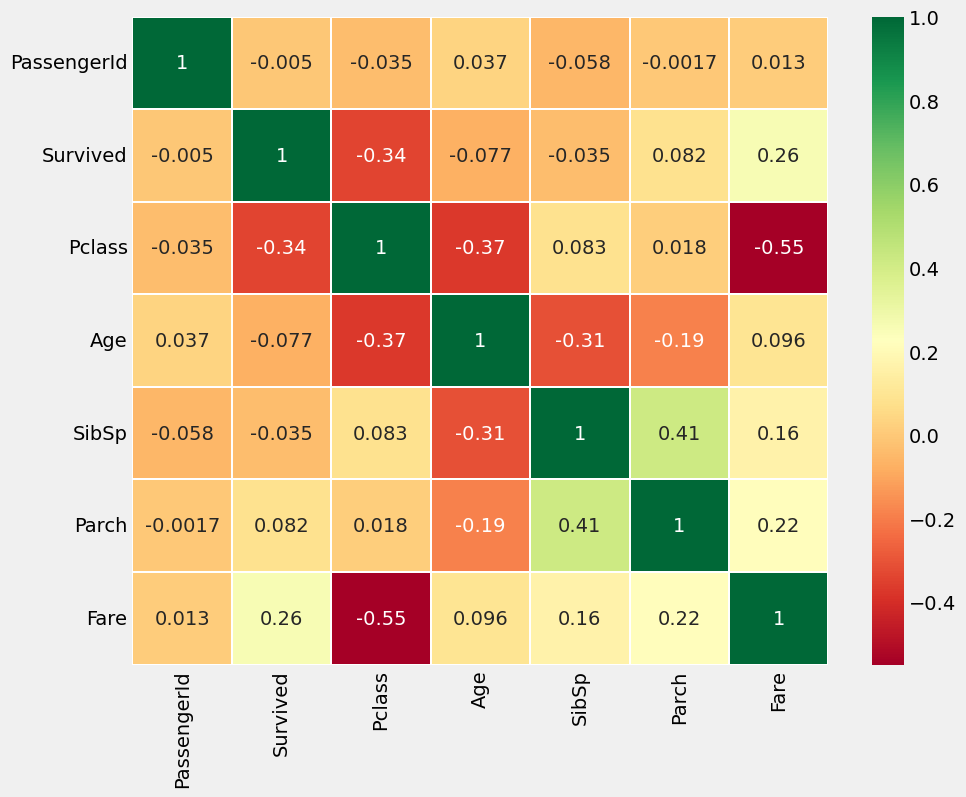

In [28]:
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) # correlation matrix
fig = plt.gcf() # add the matrix to fig
fig.set_size_inches(10,8) # set the fig size
plt.show() # show the matrix

We observe that our features are not much correlated with a maximum positive value of **0.41** between *Parch* and *SibSp* (our family size indicators) and a maximum negative value of **-0.55** between *Fare* and *Pclass*. We can now continue with all of our features and treat those redundancy in our feature engineering part.

## II. Feature Engineering and Data Wrangling

Feature engineering is the process of selecting, creating, and transforming features (i.e., independent variables or predictors) in a dataset to improve the performance of a machine learning model. Overall, feature engineering is essential for building accurate and efficient machine learning models. By **selecting**, **creating**, and **transforming features** appropriately, we can **improve model performance**, **handle missing data**, **address non-linear relationships**, **reduce dimensionality**, and **improve interpretability**.

### 1. Data Wrangling

**Data wrangling**, also known as **data cleaning** or **data pre-processing**, is the process of transforming and preparing raw data into a format that is suitable for analysis. It helps to **ensure data quality**, **improve data structure**, **facilitate data analysis**, **reduce computational costs**, and **improve data visualization**. By performing effective data wrangling, we can transform raw data into valuable insights and make informed decisions based on the data.

#### a. Filling missing values from the Age column

As we saw earlier, our *Age* column contains **177 missing values**. 

In [29]:
train_df.Age.isnull().sum()

177

Here are three methods to try to fill those missing values :

- Filling in with the **mean value of the dataset**.
- **Use correlated features** to guess the passenger's age
- **Combine both of the previous methods** to add a mean value from sets of correlated features

As both first and third methods will add **noise** to our dataset, we will work on the **second method**. We could guess missing ages with features like *Pclass* and *Sex*, but instead we will use a still unused feature : *Name*.

In [30]:
train_df[["Name","Sex"]].head()

,Name,Sex
0,"Braund, Mr. Owen Harris",male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,"Allen, Mr. William Henry",male


As we can see, each name follows the same pattern and is splitted in different sections. Firstly their **family name**, then, after a comma, their **title** ended by a dot, then their **firstnames**. For married women, the husband's name is written as described before and the wife's name is added right after between parenthesis. We will now try to guess each missing age thanks to the passenger's title, so let's extract them into a new *Title* column. 

In [31]:
train_df['Title'] = 0 # Creating our new Title column
for i in train_df: # For each passenger in our training dataset
    train_df['Title']=train_df.Name.str.extract('([A-Za-z]+)\.') # Extracts each passenger's title
    
test_df['Title'] = 0 # Creating our new Title column
for i in test_df: # For each passenger in our training dataset
    test_df['Title'] = test_df.Name.str.extract('([A-Za-z]+)\.') # Extracts each passenger's title

pd.crosstab(train_df.Title, train_df.Sex).T.style.background_gradient(cmap='rocket_r') # Seeing which gender is associated to each title

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


A lot of those title are actually quite redundant with the most used ones. Let's replace them to keep coherence in our *Title* values.

In [32]:
train_df['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Other','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mrs'],inplace=True)
test_df['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Other','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mrs'],inplace=True)

train_df.groupby('Title')['Age'].mean() # Mean age for each Title

Title
Master     4.574167
Miss      21.860000
Mr        32.601737
Mrs       35.981818
Other     44.333333
Name: Age, dtype: float64

Now that we have the mean age for each title, we can easily fill our missing values with those brand new calculated values.

In [33]:
## Assigning missing values the ceiling value of each meaning title age
train_df.loc[(train_df.Age.isnull())&(train_df.Title=='Mr'),'Age'] = 33
train_df.loc[(train_df.Age.isnull())&(train_df.Title=='Mrs'),'Age'] = 36
train_df.loc[(train_df.Age.isnull())&(train_df.Title=='Master'),'Age'] = 5
train_df.loc[(train_df.Age.isnull())&(train_df.Title=='Miss'),'Age'] = 22
train_df.loc[(train_df.Age.isnull())&(train_df.Title=='Other'),'Age'] = 45

test_df.loc[(test_df.Age.isnull())&(test_df.Title=='Mr'),'Age'] = 33
test_df.loc[(test_df.Age.isnull())&(test_df.Title=='Mrs'),'Age'] = 36
test_df.loc[(test_df.Age.isnull())&(test_df.Title=='Master'),'Age'] = 5
test_df.loc[(test_df.Age.isnull())&(test_df.Title=='Miss'),'Age'] = 22
test_df.loc[(test_df.Age.isnull())&(test_df.Title=='Other'),'Age'] = 45

And now we can finally verify that our *Age* column doesn't have any more missing values.

In [34]:
train_df.Age.isnull().any() 

False

#### b. Filling missing values from the Embarked column

As we saw earlier, our *Embarked* column contains **2 missing values**. 

In [35]:
train_df.Embarked.isnull().sum()

2

As we saw in our EDA, the vast majority of passengers came from Southampton. Let's just assume that it is also the case for those 2 passengers.

In [36]:
train_df['Embarked'].fillna('S',inplace=True)
test_df['Embarked'].fillna('S',inplace=True)

train_df.Embarked.isnull().any()

False

#### c. Convert string values into numerical values

Since we cannot pass string values to our predictive model, let's assign a **numerical value for each gender** of our training dataset, and create **dummies** for our other categorical values.

In [37]:
train_df['Sex'].replace(['male','female'],[0,1],inplace=True)
train_df = pd.get_dummies(train_df, columns=['Embarked','Title'], drop_first=True)

test_df['Sex'].replace(['male','female'],[0,1],inplace=True)
test_df = pd.get_dummies(test_df, columns=['Embarked','Title'], drop_first=True)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,0,1,0,0


### 2. Feature Engineering

The features used in a machine learning model can have a significant impact on its performance. By selecting or creating the right features and transforming them appropriately, we can **improve the accuracy and generalization ability of the model**.

#### a. Extracting Age information

As I said earlier, *Age* being a continuous feature will cause problems when entering the prediction phase. What we can do now is either force each age to become an integer, but we might lose some useful information out of this, or group a range of ages under a unique value.

We know that our *Age* range is 0-80. Let's split this range into 5 bins of size 16 to have :

- 0 years old → 16 years old
- 17 years old → 32 years old
- 33 years old → 48 years old
- 49 years old → 64 years old
- 65 years old → 80 years old

Let's create a new *AgeBand* column for this new feature, and assign it values from 0 to 4 for each age group.

In [38]:
train_df['AgeBand'] = 0
train_df.loc[train_df['Age']<=16,'AgeBand'] = 0
train_df.loc[(train_df['Age']>16)&(train_df['Age']<=32),'AgeBand'] = 1
train_df.loc[(train_df['Age']>32)&(train_df['Age']<=48),'AgeBand'] = 2
train_df.loc[(train_df['Age']>48)&(train_df['Age']<=64),'AgeBand'] = 3
train_df.loc[train_df['Age']>64,'AgeBand'] = 4

test_df['AgeBand'] = 0
test_df.loc[test_df['Age']<=16,'AgeBand'] = 0
test_df.loc[(test_df['Age']>16)&(test_df['Age']<=32),'AgeBand'] = 1
test_df.loc[(test_df['Age']>32)&(test_df['Age']<=48),'AgeBand'] = 2
test_df.loc[(test_df['Age']>48)&(test_df['Age']<=64),'AgeBand'] = 3
test_df.loc[test_df['Age']>64,'AgeBand'] = 4

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,1,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,0,0,1,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,0,1,0,0,2


Let's now check how they are distributed and if our conclusions drawn during the EDA are still valid.

In [39]:
train_df['AgeBand'].value_counts().to_frame().style.background_gradient(cmap='rocket_r')

,AgeBand
1,382
2,325
0,104
3,69
4,11


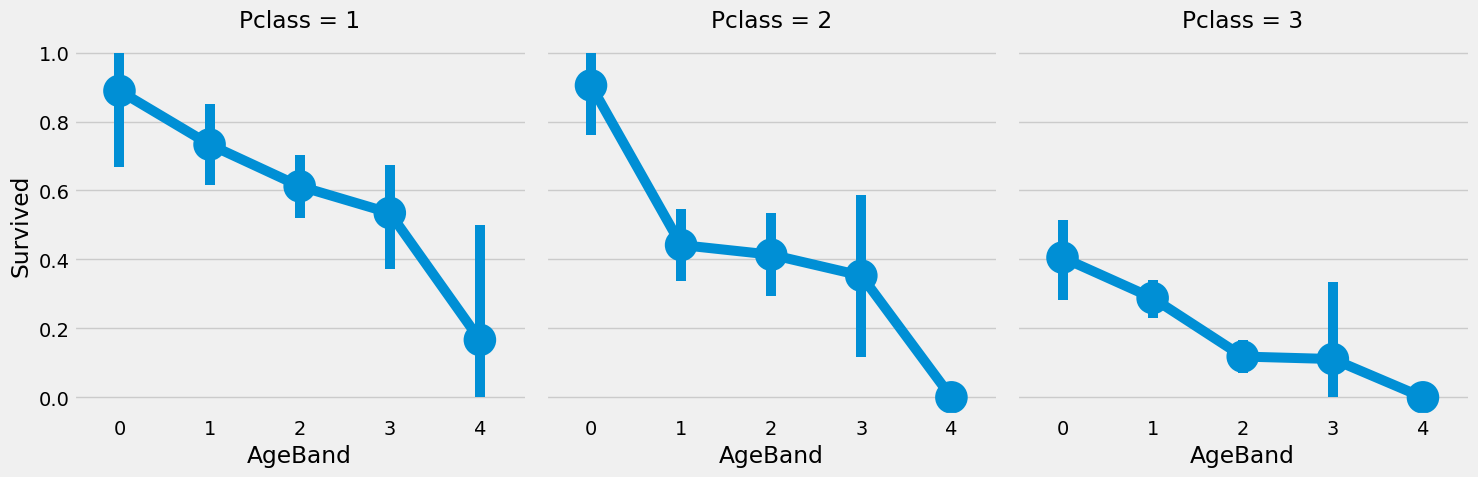

In [40]:
sns.catplot(data=train_df, x='AgeBand', y='Survived', col='Pclass', kind="point")
plt.show()

Our survival rate still decrease as age is increasing and so, regardless of the passenger's class. Our conclusions are still correct.

#### b. Extracting Family information

As we saw in the correlation matrix, *SibSp* and *Parch* are positively correlated at **0.41**. Because they share a good amount of information, we can create a new feature for our dataset :

- **FamilySize** : An addition of *SibSp* and *Parch* to know how many members are travelling with the passenger.

Let's create it in our training dataset and see if we don't lose information by doing this.

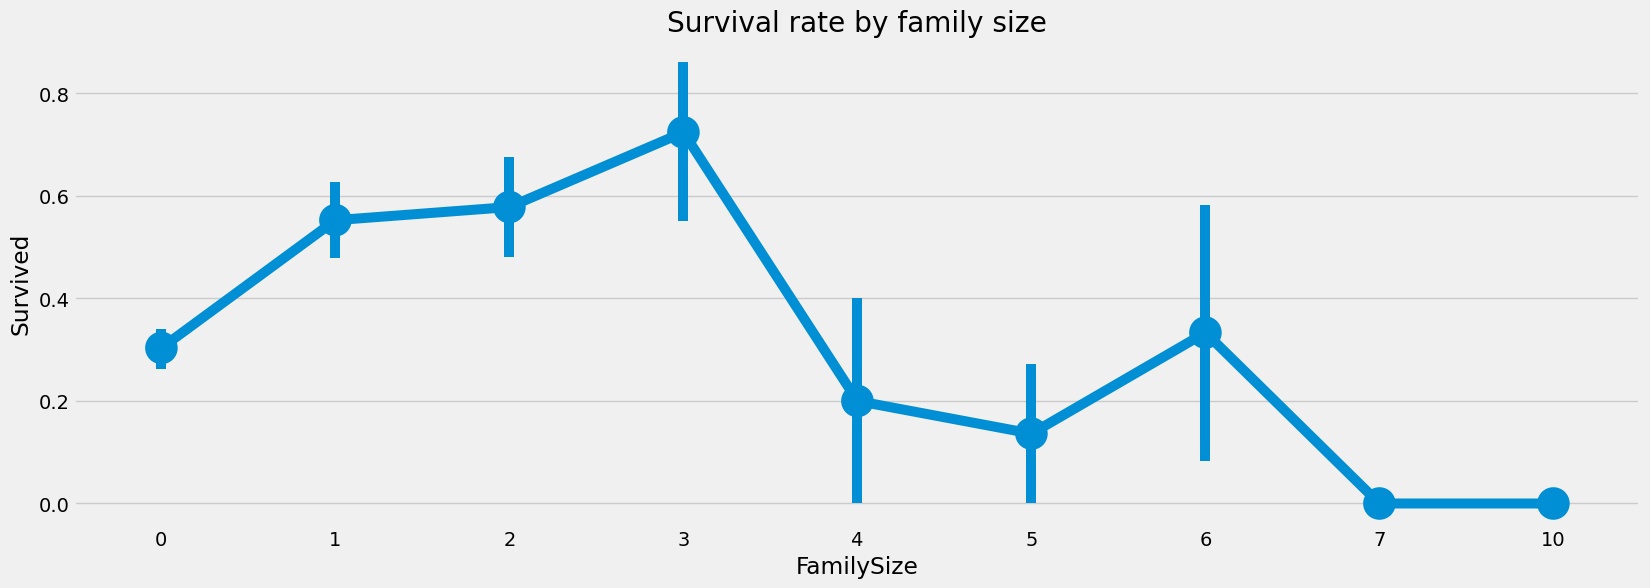

In [41]:
train_df['FamilySize'] = 0
train_df['FamilySize'] = train_df['Parch'] + train_df['SibSp']

test_df['FamilySize'] = 0
test_df['FamilySize'] = test_df['Parch'] + test_df['SibSp']

f,ax=plt.subplots(1,1,figsize=(18,6))
sns.pointplot(data=train_df, x='FamilySize', y='Survived')
ax.set_title('Survival rate by family size')
plt.show()

As we saw earlier, having more than 4 family members will significantly decrease your survival rate, as well as being alone. Let's see if being alone affects significantly the survival rate of the passenger, in comparison with their class and gender.

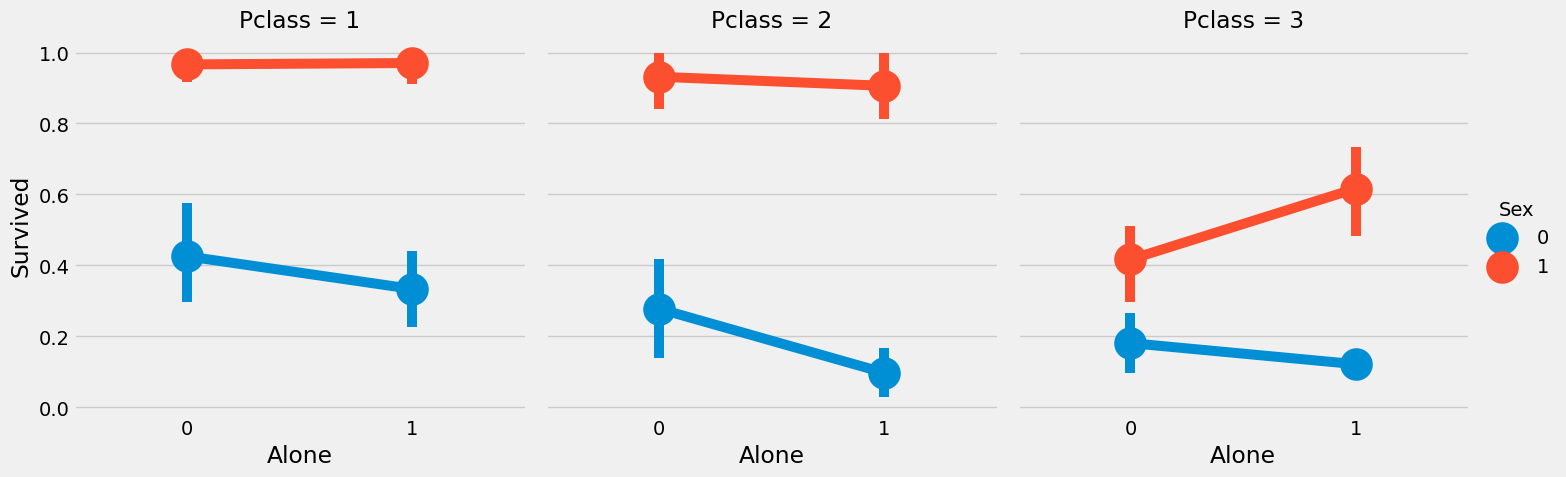

In [42]:
alone_df = train_df.copy()
alone_df['Alone'] = 0
alone_df.loc[alone_df.FamilySize==0, 'Alone'] = 1

sns.catplot(data=alone_df, x='Alone', y='Survived', hue='Sex', col='Pclass', kind="point")
plt.show()

We can see that being alone decrease the survival rate of the passenger regardless of its class and gender, except for women in third class that seem to have a better survival rate when being alone.

#### c. Extracting Fare information

Just as *Age*, *Fare* is a continuous feature, and just as *Age*, we will split its values into 4 different groups contained into the newly created column : *FareBand*. Let's first find out where to split our data, and how well each group survived the sinking.

In [43]:
train_copy['FareRange'] = pd.qcut(train_copy['Fare'],4)
train_copy.groupby(['FareRange'])['Survived'].mean().to_frame().style.background_gradient(cmap='rocket_r')

,Survived
FareRange,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


As we can see, the more you paid your ticket, the more chances you had to survive. Let's now create our new *FareBand* feature and see visually our assumption.

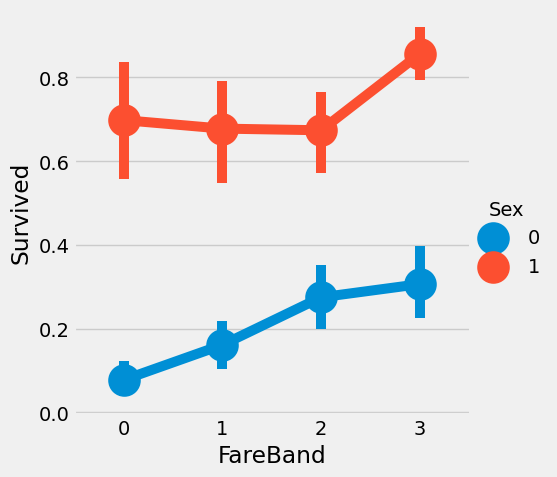

In [44]:
train_df['FareBand'] = 0
train_df.loc[train_df['Fare'] <= 7.91, 'FareBand'] = 0
train_df.loc[(train_df['Fare'] > 7.91) & (train_df['Fare'] <= 14.454), 'FareBand'] = 1
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 31), 'FareBand'] = 2
train_df.loc[(train_df['Fare'] > 31) & (train_df['Fare'] <= 513), 'FareBand'] = 3

test_df['FareBand'] = 0
test_df.loc[test_df['Fare'] <= 7.91, 'FareBand'] = 0
test_df.loc[(test_df['Fare'] > 7.91) & (test_df['Fare'] <= 14.454), 'FareBand'] = 1
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 31), 'FareBand'] = 2
test_df.loc[(test_df['Fare'] > 31) & (test_df['Fare'] <= 513), 'FareBand'] = 3

sns.catplot(data=train_df, x='FareBand', y='Survived', hue='Sex', kind="point")
plt.show()

As we can clearly see on this graph, our assumption seem to be true and so, the more you pay, the bigger chances you have to be saved from the sinking.

#### d. Dropping unneeded features

Because we created a bunch of new useful features, some of the old ones are now redundant with them, or simply unnecessary at all. Let's clean this up before beginning our predictive models. Here are the dropped features and why we drop them :

- *Name* : We cannot convert it to a categorical value, and the *Title* column was extracted from this one so we actually still have some of the information it contains
- *Age* : We transformed it into our *AgeBand* feature so we won't need it.
- *Fare* : Same reason than for the *Age* column, we created the *FareBand* column out of it.
- *Ticket* : We could have extracted some information about the family or the class of the passenger out of it, but as we already have this information we won't need it anymore.
- *Cabin* : This feature contains too much missing and duplicated values.
- *PassengerId* : This feature doesn't contain any useful information.

Now let's do it and look one last time at our correlation matrix with all of our newly created features.

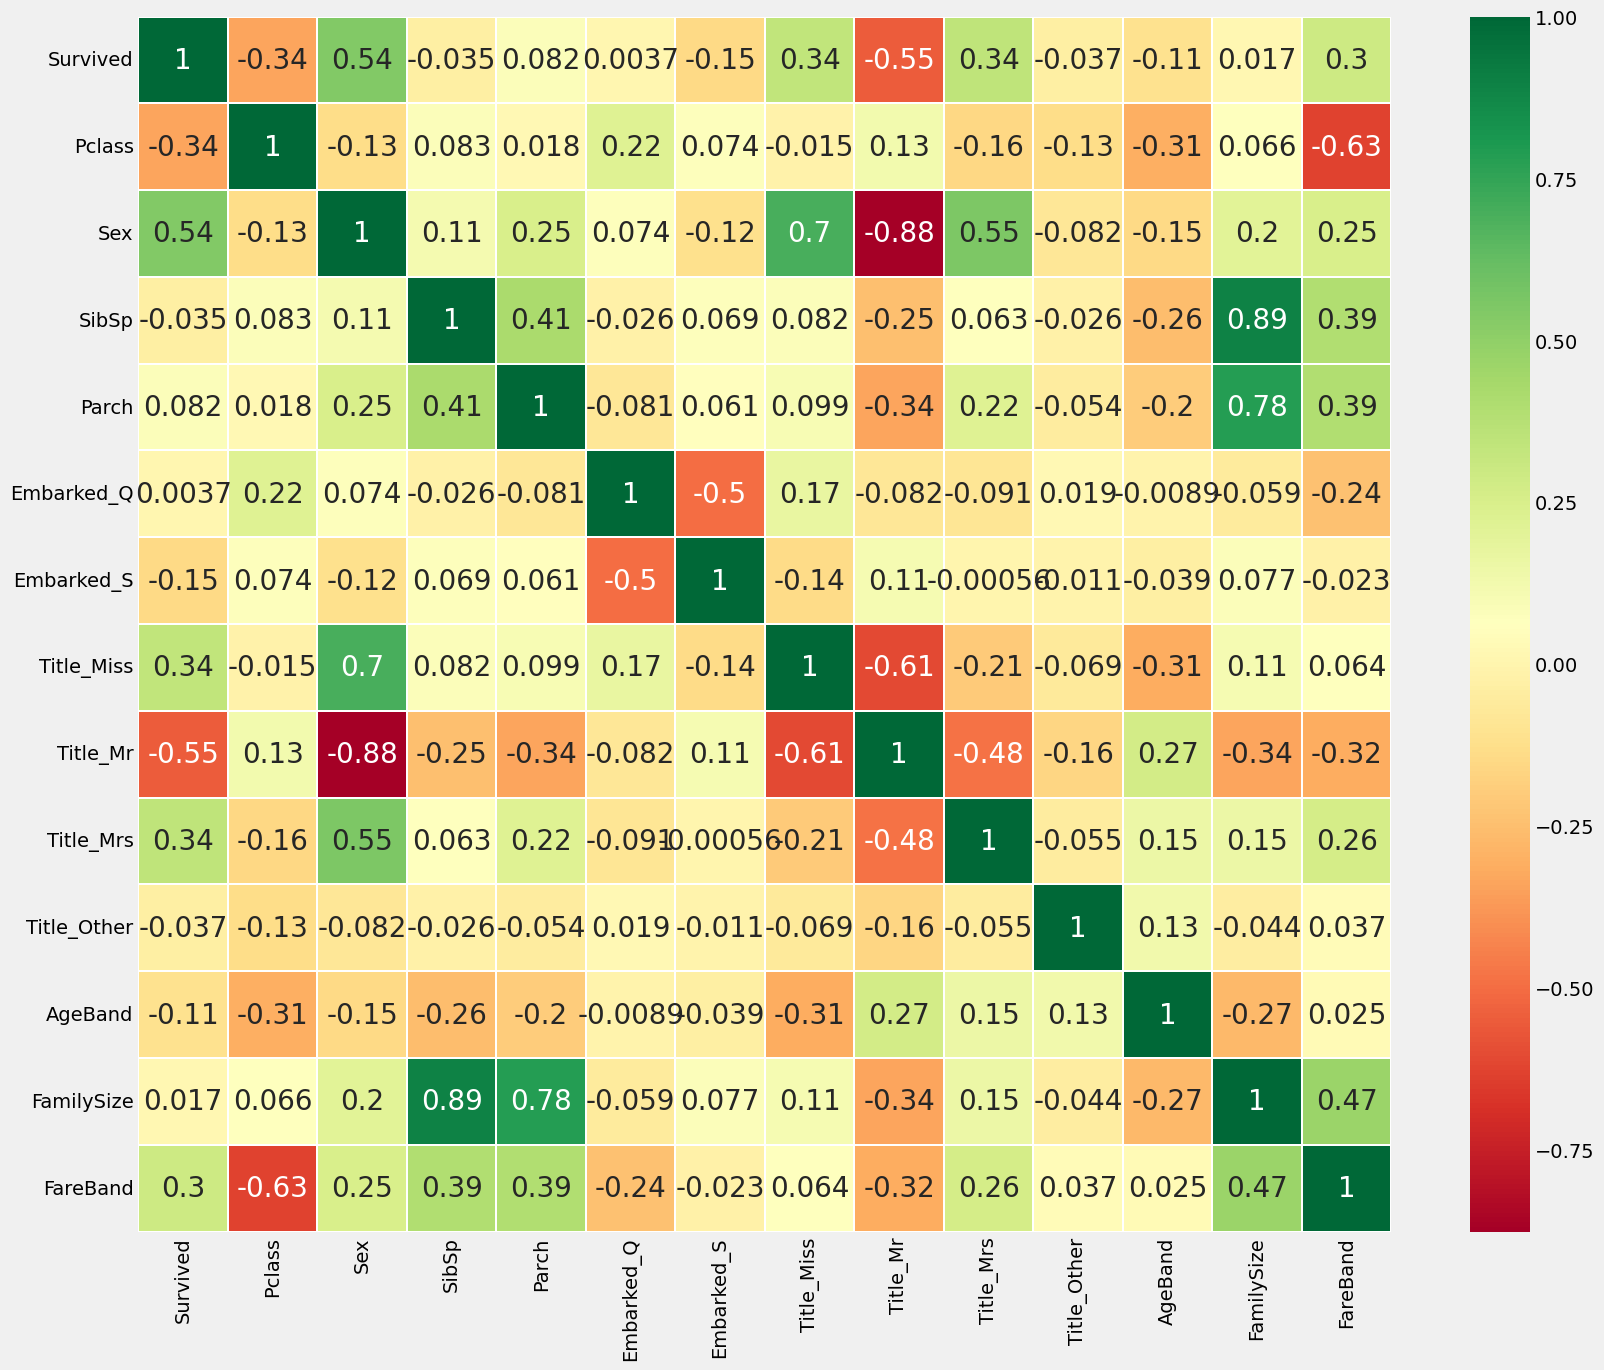

In [45]:
train_df.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'PassengerId'], axis=1, inplace=True)
test_df.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'PassengerId'], axis=1, inplace=True)

sns.heatmap(train_df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

We can logically see that *FamilySize* is positively correlated with both *SibSp* and *Parch* up to respectively **0.89** and **0.78**. We can also observe that *FareBand* is negatively correlated with both *Pclass* (**-0.63**) and that *Title* is correlated with *Sex*.

## III. Predictive Modeling

Now that we've done our EDA and feature engineering, it's time to actually build a model that can answer our problematic, which is whether a given passenger survived or not the titanic sinking. For this, we'll use various classification algorithms :

- **Logistic Regression**
- **Linear Support Vector Machines**
- **Radial Support Vector Machines**
- **K-Nearest Neighbours**
- **Gaussian Naive Bayes**
- **Decision Tree**
- **Random Forest**

But first, let's split our training dataset into a training and a validation dataset to avoid overfitting.

In [46]:
train, val = train_test_split(train_df, test_size=0.3, random_state=0, stratify=train_df['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = val[val.columns[1:]]
test_Y = val[val.columns[:1]]
X = train_df[train_df.columns[1:]]
Y = train_df['Survived']

### 1. Logistic Regression

In [47]:
model = LogisticRegression(random_state=1)
model.fit(train_X, train_Y.values.ravel())
prediction = model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction, test_Y))

The accuracy of the Logistic Regression is 0.8283582089552238


### 2. Linear Support Vector Machine

In [48]:
model = SVC(kernel='linear', C=0.1, gamma=0.1, random_state=1)
model.fit(train_X, train_Y.values.ravel())
prediction = model.predict(test_X)
print('The accuracy of the linear SVM is', metrics.accuracy_score(prediction, test_Y))

The accuracy of the linear SVM is 0.8022388059701493


### 3. Radial Support Vector Machine

In [49]:
model = SVC(kernel='rbf', C=1, gamma=0.1, random_state=1)
model.fit(train_X,train_Y.values.ravel())
prediction = model.predict(test_X)
print('The accuracy of the radial SVM is', metrics.accuracy_score(prediction, test_Y))

The accuracy of the radial SVM is 0.8395522388059702


### 4. K-Nearest Neighbours

In [50]:
model = KNeighborsClassifier() 
model.fit(train_X, train_Y.values.ravel())
prediction = model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction, test_Y))

The accuracy of the KNN is 0.8097014925373134


Let's try with other values for the **n_neighbors** parameter, as the default value for it is equal to **5**, to see how it affects the accuracy. 

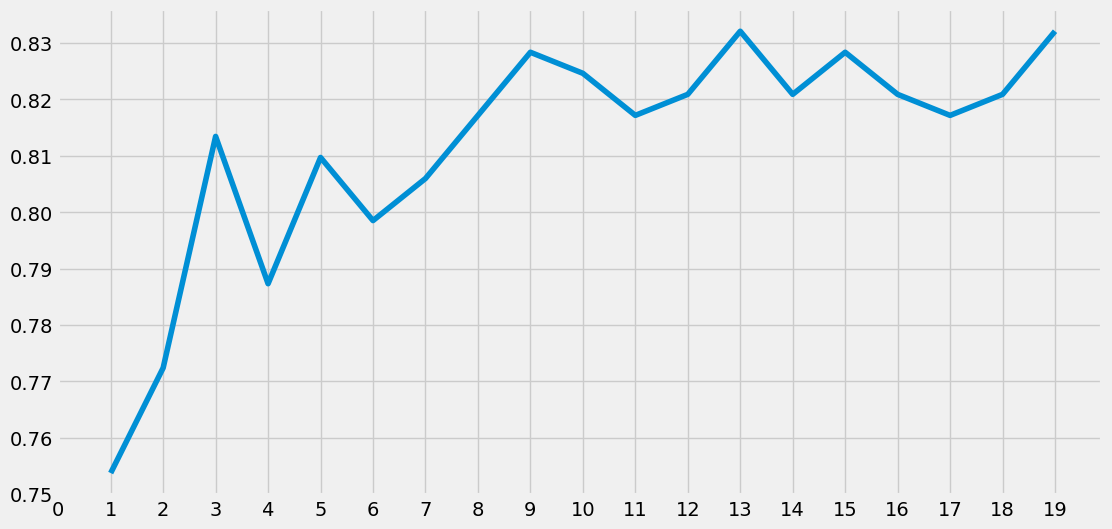

Accuracies for different values of n : [0.75373134 0.77238806 0.81343284 0.78731343 0.80970149 0.79850746
 0.80597015 0.81716418 0.82835821 0.82462687 0.81716418 0.82089552
 0.83208955 0.82089552 0.82835821 0.82089552 0.81716418 0.82089552
 0.83208955] with 0.832089552238806 as the max value.


In [51]:
metric_index = list(range(1,20))
metric = pd.Series(dtype='float64')
for i in list(range(1,20)):
    model = KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X, train_Y.values.ravel())
    prediction = model.predict(test_X)
    metric = metric.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.plot(metric_index, metric)
plt.xticks(list(range(0,20)))
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n :', metric.values, 'with', metric.values.max(), 'as the max value.')

### 5. Gaussian Naive Bayes

In [52]:
model = GaussianNB()
model.fit(train_X, train_Y.values.ravel())
prediction = model.predict(test_X)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(prediction, test_Y))

The accuracy of the NaiveBayes is 0.8059701492537313


### 6. Decision Tree

In [53]:
model = DecisionTreeClassifier(random_state=1)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction, test_Y))

The accuracy of the Decision Tree is 0.8059701492537313


### 7. Random Forest

In [54]:
model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(train_X, train_Y.values.ravel())
prediction = model.predict(test_X)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction, test_Y))

The accuracy of the Random Forests is 0.8022388059701493


Now that we've got our accuracies for each model, it's time to see how it could fluctuate thanks to **cross validation**.

## IV. Cross Validation

Because we splitted our data into a training and a validation test, or simply because of the nature of the dataset, our data can be imbalanced. To correct this, we need to train and test our model on each instance of the dataset, to see how its accuracy evolve. We can then keep the average accuracy of the model.

### 1. K-Fold Cross Validation

**K-fold cross-validation** is a common technique used in machine learning to evaluate a model's performance on a dataset. The main idea of this technique is to divide the data into k equal-sized groups, or "folds," and then use k-1 of these folds as training data to fit the model and test the model's performance on the remaining group.

The process of k-fold cross-validation can be described in several steps:

- **Split the data** into k equal-sized groups (folds).
- **Select one fold** as the test set, and the remaining k-1 folds as the training set.
- **Fit the model** on the training set.
- **Evaluate the model's performance** on the test set using an appropriate performance measure (e.g., accuracy, precision, recall, F-measure, area under the ROC curve, etc.).
- **Repeat steps 2-4 k times** by selecting a different fold each time as the test set and using the other folds as the training set.
- **Compute the average performance of the model** on the k test sets.

K-fold cross-validation is useful because it allows for the use of all data for training and evaluation, which can provide a more reliable estimate of the model's performance than simply dividing the data into training and test sets.

In [55]:
kfold = KFold(n_splits=10) # k = 10, split the data into 10 equal parts
mean = []
accuracy = []
std = []
classifiers=['Logistic Regression', 'Linear Svm', 'Radial Svm', 'KNN', 'Gaussian Naive Bayes', 'Decision Tree',  'Random Forest']
models=[LogisticRegression(), SVC(kernel='linear'), SVC(kernel='rbf'), KNeighborsClassifier(n_neighbors=13), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv = kfold, scoring = "accuracy")
    mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_variance = pd.DataFrame({'CV Mean':mean,'Std':std}, index=classifiers)       
models_variance

,CV Mean,Std
Logistic Regression,0.820424,0.027984
Linear Svm,0.820437,0.036522
Radial Svm,0.829413,0.037828
KNN,0.817129,0.042544
Gaussian Naive Bayes,0.804669,0.038512
Decision Tree,0.813733,0.032745
Random Forest,0.809238,0.035301


<AxesSubplot:>

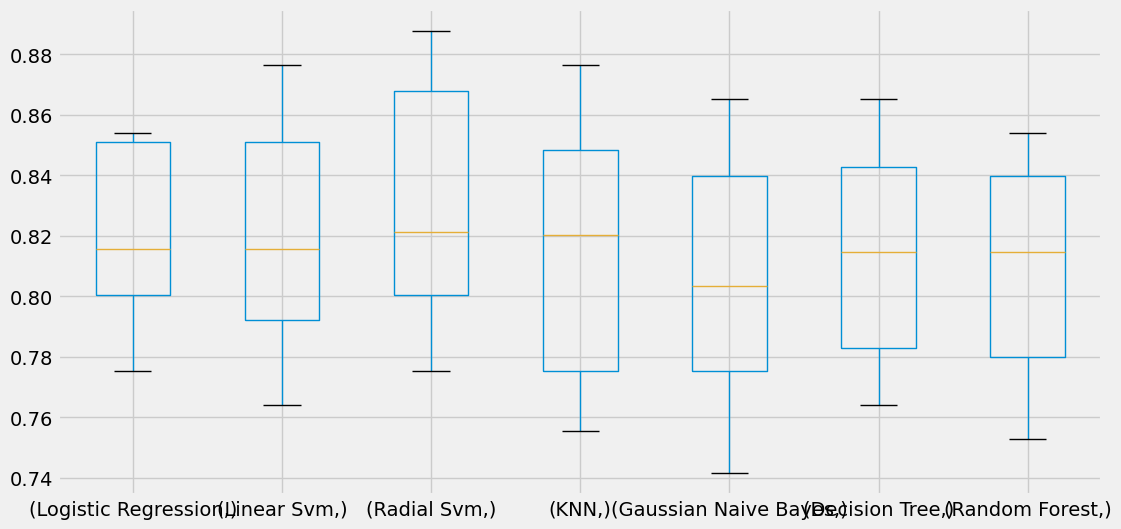

In [56]:
plt.subplots(figsize=(12,6))
models_variance_box = pd.DataFrame(accuracy, index=[classifiers])
models_variance_box.T.boxplot()

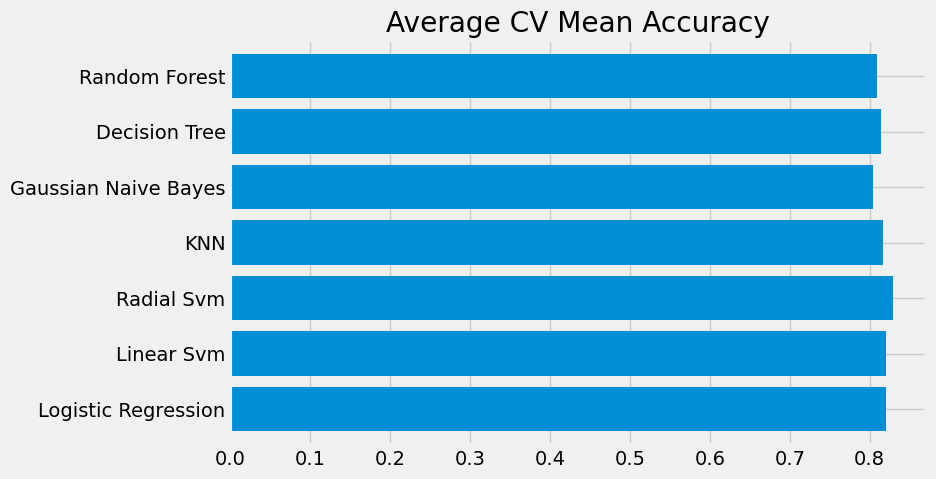

In [57]:
models_variance['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

It appears that the **Radial SVM model** have a slightly better average accuracy than the other models. To know exactly where each model did go wrong, we can use their **confusion matrix**.

### 2. Confusion Matrix

The **confusion matrix** is essentially a two-dimensional table that presents the classification results by comparing the model's predictions with the actual labels. It is typically used for binary classification problems, where there are only two possible classes, but it can also be extended to multiclass classification problems.

The two-dimensional table of the confusion matrix is divided into four areas: true positive (TP), false positive (FP), true negative (TN), and false negative (FN).

- A **true positive (TP)** is a case where the model has correctly predicted an instance of the positive class.
- A **false positive (FP)** is a case where the model has incorrectly predicted an instance of the positive class.
- A **true negative (TN)** is a case where the model has correctly predicted an instance of the negative class.
- A **false negative (FN)** is a case where the model has incorrectly predicted an instance of the negative class.

Using this confusion matrix, performance measures for the model can be calculated as follows:

- **Precision** = TP / (TP + FP)
- **Recall** = TP / (TP + FN)
- **F1-score** = 2 * (precision * recall) / (precision + recall)

Now let's plot them for each of our models.

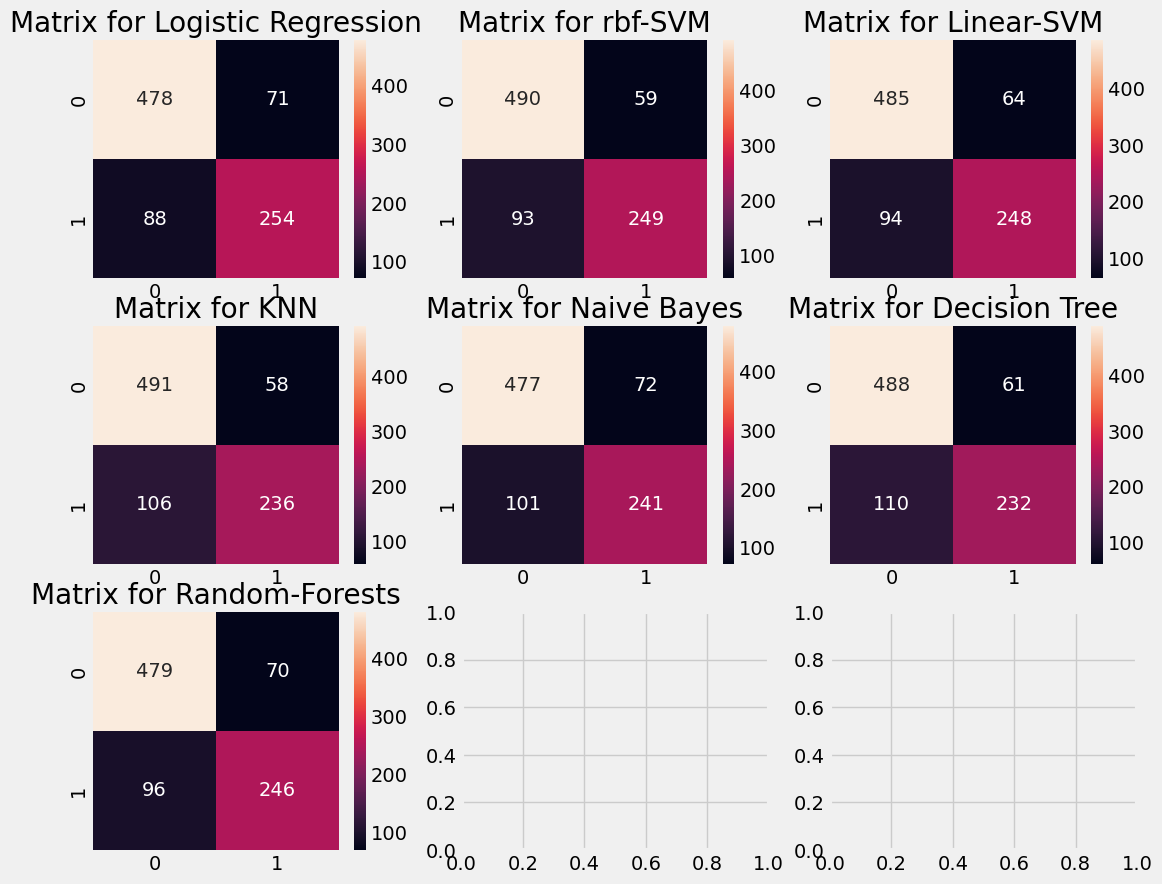

In [58]:
f,ax=plt.subplots(3,3,figsize=(12,10))

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=11),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for KNN')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Naive Bayes')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Random-Forests')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

If we look at those matrixes, we can see that the **Logistic Regression** and the **Radial SVM** models are the best to predict which passengers survived the sinking while the **KNN** and the **Radial SVM** models predict better who is going to die. Let's now try to improve our accuracy by doing hyperparameters tuning on our best models.

### 3. Hyperparameters tuning 

Hyperparameter tuning is the process of selecting the best combination of hyperparameters for a machine learning model to optimize its performance. Hyperparameters are values that are set before the training process and cannot be learned from the data, such as learning rate, number of hidden layers, number of neurons per layer, regularization strength, etc. The choice of hyperparameters can significantly affect the performance of a machine learning model.

The goal of hyperparameter tuning is to search through a range of hyperparameters to find the combination that gives the best performance on a validation dataset. This can be done using different techniques such as grid search, random search, Bayesian optimization, genetic algorithms, etc.

Here we'll use the Grid Search technique. Grid search is a commonly used technique in hyperparameter tuning, where a grid of hyperparameters is defined and the model is trained and evaluated for each combination of hyperparameters in the grid. The combination that results in the best performance on the validation dataset is then selected as the optimal set of hyperparameters.

Let's find the best hyperparameters for our **Logistic Regression**, **Random Forests** and **SVM** models.

#### a. SVM



In [59]:
C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel':kernel, 'C':C, 'gamma':gamma}
grid = GridSearchCV(estimator=SVC(), param_grid=hyper, verbose=True)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_params_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8316238779737619
{'C': 0.6, 'gamma': 0.2, 'kernel': 'rbf'}


The best score calculated for the **SVM** model is done with **C=0.6**, **gamma=0.2** and **kernel='rbf'**, and is **83.16%**.

#### b. Random Forests

In [60]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators':n_estimators}
grid = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
grid.fit(X,Y)
print(grid.best_score_)
print(grid.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8204444165463561
{'n_estimators': 400}


The best score calculated for the **Random Forests** model is done with **n_estimators=900**, and is **81.48%**.

#### c. Logistic Regression

In [61]:
C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'C':C}
grid = GridSearchCV(estimator=LogisticRegression(), param_grid=hyper, verbose=True)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
0.8204193082669009
{'C': 0.7}




We can now boost our results even more by doing **ensembling**.

## V. Ensembling

Ensembling is a technique in machine learning that involves **combining the predictions of multiple models to improve the overall performance of the system**. The basic idea behind ensembling is that by combining multiple models, each with different strengths and weaknesses, the resulting model can often achieve better performance than any individual model.

There are several types of ensembling methods, including:

- **Voting Classifier**
- **Bagging**
- **Boosting**
- **Stacking**
- **Blending**

Ensembling is a powerful technique that can significantly improve the performance of machine learning models. By combining the predictions of multiple models, **ensembling can reduce the variance and bias of the resulting model, leading to better overall performance**. However, ensembling can also be computationally expensive and require careful tuning of the base models and the ensembling method itself.

### 1. Voting Classifier

The voting classifier is a type of ensembling method in machine learning where **multiple classifiers are combined to make predictions by voting**. It is a simple and effective way to improve the accuracy and robustness of a classification model.

In a voting classifier, each base classifier is trained on the same training data and makes predictions on the test data. The predictions of the base classifiers are then combined by taking a majority vote, with the class that receives the most votes being selected as the final prediction.

There are two types of voting classifiers: **hard voting** and **soft voting**. In hard voting, the majority vote of the base classifiers is used to make the final prediction. In soft voting, the probabilities predicted by each base classifier for each class are averaged, and the class with the highest average probability is selected as the final prediction.

One advantage of the voting classifier is that **it can reduce overfitting by combining the predictions of multiple models**, which can lead to better generalization performance on new, unseen data. It can also **improve the robustness of the model by reducing the impact of outliers or noisy data**.

In [62]:
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=13)),
                                              ('RBF', SVC(probability=True, kernel='rbf', C=0.6, gamma=0.2)),
                                              ('RFor', RandomForestClassifier(n_estimators=400, random_state=0)),
                                              ('LR', LogisticRegression(C=0.7)),
                                              ('DT', DecisionTreeClassifier(random_state=0)),
                                              ('NB', GaussianNB()),
                                              ('svm', SVC(kernel='linear', probability=True))
                                             ], 
                       voting='soft').fit(train_X, train_Y.values.ravel())
print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X, test_Y))
cross_score = cross_val_score(ensemble_lin_rbf, X, Y, cv = 10, scoring = "accuracy")
print('The cross validated score is', cross_score.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8305243445692885


### 2. Bagging

Bagging (Bootstrap Aggregating) is a popular ensembling method in machine learning that involves training multiple models on different subsets of the training data and then combining their predictions. The goal of bagging is to reduce the variance of the model by generating multiple models that are less sensitive to small fluctuations in the training data.

In bagging, the training dataset is randomly sampled with replacement to create multiple new datasets, known as bootstrap samples. Each bootstrap sample is used to train a base model, which can be any type of model, such as decision trees, neural networks, or support vector machines. The base models are trained independently, and their predictions are then combined using an aggregation function, such as averaging or voting.

The main advantage of bagging is that it can reduce overfitting by generating multiple models that are less sensitive to small fluctuations in the training data. By combining the predictions of multiple models, bagging can also improve the robustness and accuracy of the resulting model.

#### a. Bagged KNN

In [63]:
bagged_knn = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
bagged_knn.fit(train_X, train_Y.values.ravel())
prediction = bagged_knn.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(bagged_knn, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is:', result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8115480649188515


#### b. Bagged Decision Tree



In [64]:
bagged_tree = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
bagged_tree.fit(train_X, train_Y.values.ravel())
prediction = bagged_tree.predict(test_X)
print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(bagged_tree, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:', result.mean())

The accuracy for bagged Decision Tree is: 0.8171641791044776
The cross validated score for bagged Decision Tree is: 0.8126466916354558


### 3. Boosting

Boosting is an ensemble learning method that aims to improve the accuracy of a base learning algorithm by sequentially training weak learners on different parts of the data and emphasizing the difficult cases. The general idea is to combine multiple weak models to create a strong model that can make accurate predictions.

Boosting works by iteratively adding weak learners to the ensemble and adjusting the weights of the training examples to emphasize the difficult cases that the current set of learners is not able to classify correctly. The final prediction is made by taking a weighted average of the predictions of all the learners in the ensemble.

The following are the key steps involved in the boosting method:

- **Train a base learner** : A weak learner, such as a decision tree or a linear regression model, is trained on the training data.

- **Weight the training examples** : Each training example is given a weight based on how well the base learner can classify it. The misclassified examples are given higher weights, while the correctly classified examples are given lower weights.

- **Train a new learner** : A new weak learner is trained on the weighted training data. This process is repeated until the desired number of learners is reached.

- **Combine the learners** : The predictions of all the learners in the ensemble are combined to make the final prediction. The weights of the learners are also adjusted to give more weight to the better performing learners.

Boosting has several advantages over other ensemble methods, such as bagging. Boosting can lead to better classification accuracy than bagging, especially when the base learners are weak and prone to underfitting. Boosting can also reduce overfitting by emphasizing the difficult cases during training. However, boosting can be sensitive to noise in the data, and it can be computationally expensive to train a large number of learners.

#### a. AdaBoost

AdaBoost (Adaptive Boosting) is a boosting algorithm that works by iteratively training a sequence of weak learners on different weighted versions of the training data. The algorithm is adaptive in the sense that it assigns higher weights to the misclassified examples, which allows subsequent learners to focus on these examples and improve the overall classification accuracy. Here we'll use a **Decision Tree** as our weak learner.

In [65]:
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8260424469413234


#### b. Stochastic Gradient Boosting

Stochastic Gradient Boosting is a variation of the traditional Gradient Boosting algorithm that introduces randomness into the training process to reduce overfitting and improve performance on large datasets. Again, our weak learner will be a **Decision Tree**.

In [66]:
gradient = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(gradient, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())

The cross validated score for Gradient Boosting is: 0.8137578027465668


#### c. XGBoost

XGBoost (Extreme Gradient Boosting) is a popular machine learning algorithm that is designed to improve the performance of traditional Gradient Boosting algorithms by using a variety of advanced techniques.

In [67]:
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:', result.mean())

The cross validated score for XGBoost is: 0.8103870162297128


We got the highest accuracy with **Voting Classifier**.

### 4. Confusion Matrix of the best model

In [68]:
model = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=13)),
                                              ('RBF', SVC(probability=True, kernel='rbf', C=0.6, gamma=0.2)),
                                              ('RFor', RandomForestClassifier(n_estimators=400, random_state=0)),
                                              ('LR', LogisticRegression(C=0.7)),
                                              ('DT', DecisionTreeClassifier(random_state=0)),
                                              ('NB', GaussianNB()),
                                              ('svm', SVC(kernel='linear', probability=True))
                                             ], 
                       voting='soft')
model.fit(X, Y)
cross_score = cross_val_score(model, X, Y, cv = 10, scoring = "accuracy")
print('The cross validated score is', cross_score.mean())

The cross validated score is 0.8305243445692885


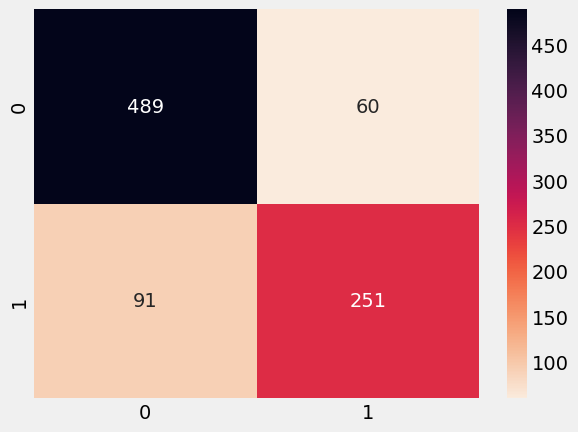

In [69]:
result = cross_val_predict(model, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='rocket_r', annot=True, fmt='2.0f')
plt.show()

## VI. Feature Importance

Feature importance is a technique used in machine learning to determine the most relevant or important features in a dataset for making accurate predictions. It is often used to understand the underlying patterns and relationships between the input variables and the output variable.

Feature importance can be determined using various methods, such as:

- **Coefficient values** : In linear models, the coefficients of the input variables represent their importance in predicting the output variable. Positive coefficients indicate a positive relationship, while negative coefficients indicate a negative relationship.

- **Permutation importance** : This method involves randomly permuting the values of a single feature and measuring the decrease in the model's performance. The larger the decrease, the more important the feature.

- **Tree-based methods** : In decision trees and random forests, the feature importance can be determined based on the number of times a feature is used to split the data and the impurity reduction achieved by each split.

- **Recursive feature elimination** : This method involves recursively removing the least important features from the dataset until a desired number of features is reached or the model's performance no longer improves.

The importance of features can be visualized using various techniques, such as bar charts or heatmaps. Feature importance can help in identifying the most important features that contribute to the predictive power of a model, as well as removing irrelevant or redundant features to improve the model's performance and reduce overfitting.

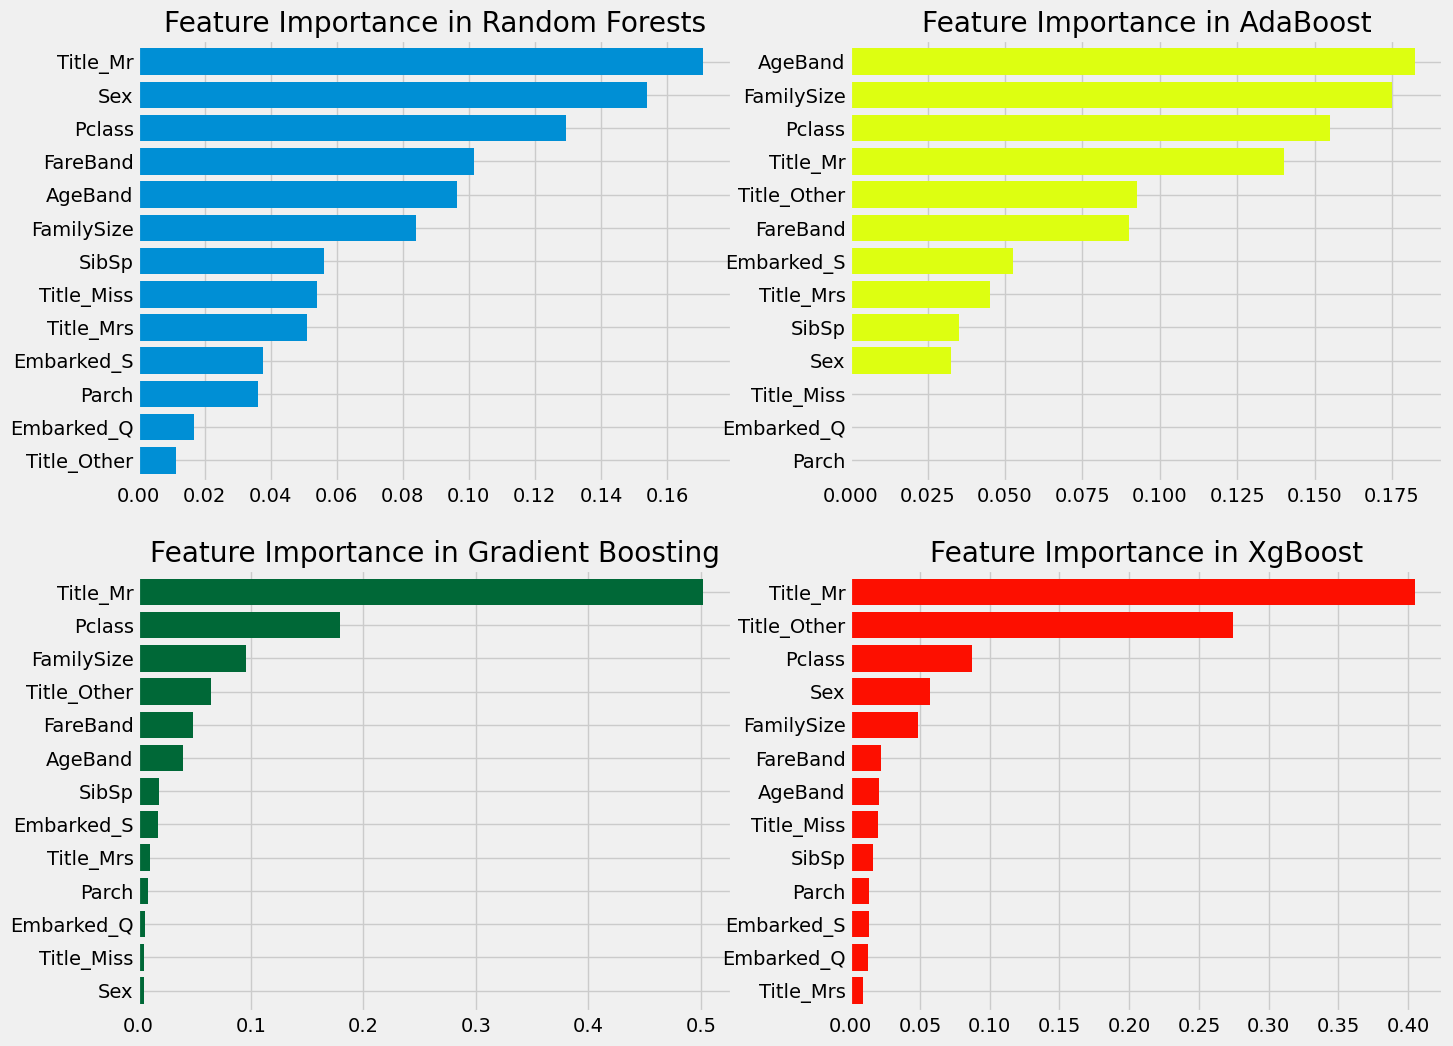

In [70]:
f,ax=plt.subplots(2,2,figsize=(15,12))

model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model = AdaBoostClassifier(n_estimators=400, learning_rate=0.05, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,1], color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,0], cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,1], color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.show()

We can see here that for all of the models, **Title**, **Pclass** and **FamilySize** are really important features to help them predict the state of a given passenger. On the other hand, the **Sex** feature isn't really important, which is the opposite of what we have fount earlier in our EDA. This could be explained by the correlation between **Sex** and **Title**.

## VII. Competition Submission

In [71]:
test_df.head()

,Pclass,Sex,SibSp,Parch,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,AgeBand,FamilySize,FareBand
0,3,0,0,0,1,0,0,1,0,0,2,0,0
1,3,1,1,0,0,1,0,0,1,0,2,1,0
2,2,0,0,0,1,0,0,1,0,0,3,0,1
3,3,0,0,0,0,1,0,1,0,0,1,0,1
4,3,1,1,1,0,1,0,0,1,0,1,2,1


In [72]:
model = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=13)),
                                              ('RBF', SVC(probability=True, kernel='rbf', C=0.6, gamma=0.2)),
                                              ('RFor', RandomForestClassifier(n_estimators=400, random_state=0)),
                                              ('LR', LogisticRegression(C=0.7)),
                                              ('DT', DecisionTreeClassifier(random_state=0)),
                                              ('NB', GaussianNB()),
                                              ('svm', SVC(kernel='linear', probability=True))
                                             ], 
                       voting='soft')
model.fit(X, Y)
predictions = model.predict(test_df)
results = pd.DataFrame(predictions, columns=['Survived']) 

<AxesSubplot:ylabel='Survived'>

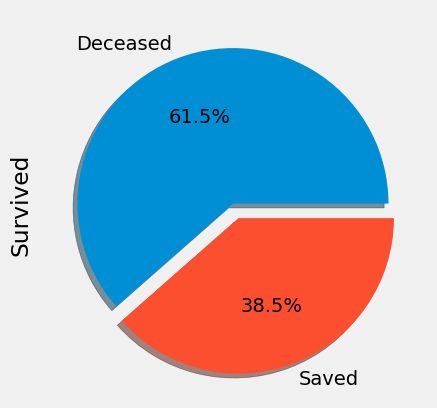

In [73]:
results['Survived'].value_counts().plot.pie(labels=['Deceased','Saved'], explode=[0,0.1], autopct='%1.1f%%', shadow=True)

In [74]:
final_df = test_df = pd.read_csv('../input/titanic/test.csv') # load our test dataset
final_df['Survived'] = results['Survived']

output = pd.DataFrame({'PassengerId': final_df.PassengerId, 'Survived': final_df.Survived})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## VIII. Note of the author

Firstly, I would like to express my sincerest gratitude to all of you who took the time to read this notebook. I am a French engineering student studying Data Science and I am still inexperienced in this field. I am always looking to improve, and I would love to hear your thoughts on how I can make this notebook and/or predictive model even better. So please, feel free to reach out to me with any comments or suggestions. If you found this notebook helpful or interesting, please consider upvoting it. Your support means the world to me, and it will encourage me to continue sharing my work with the community.

Thank you once again for your time and for being a part of my learning journey.             **--Lucas**